# Porto League Performance since 20/21

FC Porto is the team I support and represents the country I was born in. It holds a special place in my heart, so it's hard not to use it as a case study in many of my projects.

In recent years, the club has experienced several ups and downs—including major structural changes and a period of serious financial trouble that was largely kept under wraps. During this time, the team's on-field performance in the domestic league has not met the high standards that fans expect.

Notably, FC Porto last clinched the **Liga Portugal** title in the **2021/2022 season**, despite being a perennial contender. Since that championship, the team has undergone significant changes, including **two managerial changes during the current 2024/2025 season** alone.

As a fan with a keen interest in analytics, I’m deeply curious to explore *what the stats say*. That curiosity is the foundation of this project.

This project aims to estimate and plot **rolling averages** of various **team performance metrics** for FC Porto, covering the period from the **2020/2021 season to the current 2024/2025 season**. These rolling averages will offer visual insights into performance trends by:

- Highlighting when the league was last won
- Marking the beginnings of new seasons
- Identifying managerial changes

The goal is to bring objective data to discussions that are often driven by emotion and personal bias. Data-driven analysis can help us understand where the team has genuinely struggled or made progress over time.

---

``Additional Context``

- **Historical Success & Benchmarking:**  
  FC Porto's long tradition of domestic and European success sets a high performance benchmark, making any deviations—such as the recent championship drought—especially significant.

- **Management & Structural Changes:**  
  Beyond on-field performance, multiple managerial changes and other structural shifts (like financial restructuring) have influenced team dynamics and tactical consistency.

- **Financial Challenges:**  
  The club's financial issues, though initially obscured from public view, have disrupted operations and impacted strategic decision-making and resource allocation.

- **Competitive Landscape:**  
  Increased competitiveness in the Portuguese league—with rivals like Benfica and Sporting CP also vying for supremacy—adds to the challenges FC Porto faces, underscoring the importance of closely monitoring performance metrics.

- **Analytical Rationale:**  
  By evaluating rolling averages over multiple seasons (from 20/21 to 24/25), this project provides a data-driven narrative that complements fan sentiment, offering an objective view of how managerial and strategic changes affect team performance.


# Imports

In [1]:
import locale
import sys

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
import soccerdata as sd
from highlight_text import fig_text

sys.path.append(r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\Analysis Tools") # change path as needed
import urllib
from shutil import which
from urllib.request import urlopen

import function_town as ft
from PIL import Image


[04/13/25 20:13:55] INFO     Custom team name replacements loaded from                                ]8;id=727074;file://c:\Users\Vitor\anaconda3\Lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=825667;file://c:\Users\Vitor\anaconda3\Lib\site-packages\soccerdata\_config.py#86\86]8;;\
                             C:\Users\Vitor\soccerdata\config\teamname_replacements.json.                          

                    INFO     Custom league dict loaded from                                          ]8;id=395299;file://c:\Users\Vitor\anaconda3\Lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=244678;file://c:\Users\Vitor\anaconda3\Lib\site-packages\soccerdata\_config.py#195\195]8;;\
                             C:\Users\Vitor\soccerdata\config\league_dict.json.                                    

# Data Scraping

To collect the event data we need, we'll be using the soccerdata package, more specifically the WhoScored module.

In [ ]:
# Check available leagues

locale.setlocale(locale.LC_TIME, "en_US.UTF-8")

sd.FotMob.available_leagues()

The code above provides access to more leagues than the default configuration of the `soccerdata` package. This is possible because I customized the `league_dict.json` file, following the official documentation: [How to Add Custom Leagues](https://soccerdata.readthedocs.io/en/latest/howto/custom-leagues.html).

The modified `league_dict.json` file is available in the **Analysis Tools** folder. Additionally, you’ll find a customized version of the `teamname_replacements.json` file, which I adapted from the original to better handle inconsistencies in team naming across different data sources.

### Scraping team match stats For Primeira Liga 20/21

In [ ]:
locale.setlocale(
    locale.LC_TIME, "en_US.UTF-8"
)  # This line is used in every cell before using code from socceradata, throughout the notebook, to avoid errors related to date formats
pt_2021 = sd.FotMob(
    leagues="PRT-Liga Portugal", seasons="2020/2021", no_cache=False, no_store=False
)
print(pt_2021.__doc__)

primeira_liga_2021 = pt_2021.read_team_match_stats(opponent_stats=True)
primeira_liga_2021.head()

### Scraping team match stats For Primeira Liga 21/22

In [ ]:
locale.setlocale(locale.LC_TIME, "en_US.UTF-8")
pt_2122 = sd.FotMob(
    leagues="PRT-Liga Portugal", seasons="2021/2022", no_cache=False, no_store=False
)
print(pt_2122.__doc__)

primeira_liga_2122 = pt_2122.read_team_match_stats(opponent_stats=True)
primeira_liga_2122.head()

### Scraping team match stats For Primeira Liga 22/23

In [ ]:
locale.setlocale(locale.LC_TIME, "en_US.UTF-8")
pt_2223 = sd.FotMob(
    leagues="PRT-Liga Portugal", seasons="2022/2023", no_cache=False, no_store=False
)
print(pt_2223.__doc__)

primeira_liga_2223 = pt_2223.read_team_match_stats(opponent_stats=True)
primeira_liga_2223.head()

### Scraping team match stats For Primeira Liga 23/24

In [ ]:
locale.setlocale(locale.LC_TIME, "en_US.UTF-8")
pt_2324 = sd.FotMob(
    leagues="PRT-Liga Portugal", seasons="2023/2024", no_cache=False, no_store=False
)
print(pt_2324.__doc__)

primeira_liga_2324 = pt_2324.read_team_match_stats(opponent_stats=True)
primeira_liga_2324.head()

### Scraping team match stats For Primeira Liga 24/25

In [ ]:
locale.setlocale(locale.LC_TIME, "en_US.UTF-8")
pt_2425 = sd.FotMob(
    leagues="PRT-Liga Portugal", seasons="2024/2025", no_cache=False, no_store=False
)
print(pt_2425.__doc__)

primeira_liga_2425 = pt_2425.read_team_match_stats(opponent_stats=True)
primeira_liga_2425.head()

# Data Engineering (1)

I created the function `clean_FotMob_df_1_factor` (not to be confused with the `clean_FotMob_df_2_factor`), that is available in the `function_town.py` file, in the Analysis Tools folder.

**Summary of `clean_FotMob_df_1_factor` Function:**

- **Purpose:**  
  Cleans and standardizes FotMob data by extracting match details and splitting the data into home and away records before merging them.

- **Key Steps:**
  - **Extract Match Information:**  
    Splits the "game" column into "match date" and "matchup", and further separates "matchup" into "home team" and "away team".
    
  - **Determine Team Role:**  
    Labels each row as "home" or "away" based on whether the team's name matches the "home team" or "away team".
    
  - **Separate Data:**  
    Creates two DataFrames (`home_df` and `away_df`) based on the team role.
    
  - **Reorder and Rename Columns:**  
    Reorders columns to prioritize key identifiers and renames performance metric columns by appending "Home Team" or "Away Team" suffixes.
    
  - **Merge and Format:**  
    Merges the two DataFrames using common identifiers and formats the "Season" column and data types appropriately.

- **Output:**  
  A cleaned and merged DataFrame with standardized columns and data types, ready for further analysis.


In [ ]:
primeira_liga_2021 = ft.clean_FotMob_df_1_factor(primeira_liga_2021)
primeira_liga_2122 = ft.clean_FotMob_df_1_factor(primeira_liga_2122)
primeira_liga_2223 = ft.clean_FotMob_df_1_factor(primeira_liga_2223)
primeira_liga_2324 = ft.clean_FotMob_df_1_factor(primeira_liga_2324)
primeira_liga_2425 = ft.clean_FotMob_df_1_factor(primeira_liga_2425)

# Checkpoint: data saving

We save to a pickle format because it's more efficient in handling larger datasets, and preserves dtypes.

In [ ]:
primeira_liga_2021.to_pickle(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\data\primeira_liga_2021_team_match_stats.pkl" # Change path as needed
)
primeira_liga_2122.to_pickle(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\data\primeira_liga_2122_team_match_stats.pkl" # Change path as needed
)
primeira_liga_2223.to_pickle(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\data\primeira_liga_2223_team_match_stats.pkl" # Change path as needed
)
primeira_liga_2324.to_pickle(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\data\primeira_liga_2324_team_match_stats.pkl" # Change path as needed
)
primeira_liga_2425.to_pickle(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\data\primeira_liga_2425_team_match_stats.pkl" # Change path as needed
)

# Checkpoint: data loading

This section can serve as a checkpoint after saving the data a first time. If we have to reset the kernel or pick the notebook back up later, we can avoid scraping the data again (using cached data is a possibility to aid in that, but this avoids depending on that as well).

In [12]:
primeira_liga_2021 = pd.read_pickle(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\data\primeira_liga_2021_team_match_stats.pkl" # Change path as needed
)
primeira_liga_2122 = pd.read_pickle(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\data\primeira_liga_2122_team_match_stats.pkl" # Change path as needed
)
primeira_liga_2223 = pd.read_pickle(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\data\primeira_liga_2223_team_match_stats.pkl" # Change path as needed
)
primeira_liga_2324 = pd.read_pickle(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\data\primeira_liga_2324_team_match_stats.pkl" # Change path as needed
)
primeira_liga_2425 = pd.read_pickle(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\data\primeira_liga_2425_team_match_stats.pkl" # Change path as needed
)

# Data Engineering (2)

In [13]:
# Joining the dfs from different seasons into one

primeira_liga_1920_2425 = pd.concat(
    [
        primeira_liga_2021,
        primeira_liga_2122,
        primeira_liga_2223,
        primeira_liga_2324,
        primeira_liga_2425,
    ]
).reset_index(drop=True)
primeira_liga_1920_2425

,League,Season,Match Date,Matchday,Matchup,Match ID,Match URL,Home Team,Home Team Score,Away Team Score,...,Accurate Passes Away Team,Ball Possession Away Team,Big Chances Away Team,Big Chances Missed Away Team,Corners Away Team,Expected Goals (Xg) Away Team,Fouls Committed Away Team,Shots On Target Away Team,Total Shots Away Team,Accurate Passes (%) Away Team
0,PRT-Liga Portugal,20/21,2020-09-18,1,Famalicao-Benfica,3421632,https://fotmob.com/matches/famalicao-vs-benfic...,Famalicao,1,5,...,428.0,62.0,6.0,3.0,4.0,2.97,10.0,7.0,14.0,0.86
1,PRT-Liga Portugal,20/21,2020-09-18,1,Vitoria de Guimaraes-Cova da Piedade SAD,3421643,https://fotmob.com/matches/vitoria-de-guimarae...,Vitoria de Guimaraes,0,1,...,258.0,39.0,1.0,0.0,2.0,0.53,21.0,3.0,4.0,0.76
2,PRT-Liga Portugal,20/21,2020-09-19,1,FC Porto-Braga,3421641,https://fotmob.com/matches/fc-porto-vs-braga/3...,FC Porto,3,1,...,321.0,47.0,1.0,1.0,1.0,0.59,18.0,1.0,7.0,0.79
3,PRT-Liga Portugal,20/21,2020-09-19,1,Nacional-Boavista,3421645,https://fotmob.com/matches/boavista-vs-naciona...,Nacional,3,3,...,258.0,44.0,0.0,0.0,4.0,0.35,22.0,3.0,8.0,0.81
4,PRT-Liga Portugal,20/21,2020-09-20,1,Moreirense-Farense,3421642,https://fotmob.com/matches/farense-vs-moreiren...,Moreirense,2,0,...,259.0,50.0,0.0,0.0,6.0,0.63,12.0,2.0,14.0,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,PRT-Liga Portugal,24/25,2025-04-06,28,Gil Vicente-Moreirense,4539317,https://fotmob.com/matches/moreirense-vs-gil-v...,Gil Vicente,0,1,...,292.0,42.0,2.0,1.0,0.0,0.77,14.0,3.0,8.0,0.82
1472,PRT-Liga Portugal,24/25,2025-04-06,28,Nacional-Estrela da Amadora,4539314,https://fotmob.com/matches/nacional-vs-estrela...,Nacional,0,1,...,158.0,39.0,3.0,2.0,5.0,1.05,14.0,3.0,12.0,0.69
1473,PRT-Liga Portugal,24/25,2025-04-07,28,Farense-Casa Pia AC,4539313,https://fotmob.com/matches/farense-vs-casa-pia...,Farense,0,0,...,276.0,50.0,0.0,0.0,3.0,0.03,21.0,0.0,2.0,0.77
1474,PRT-Liga Portugal,24/25,2025-04-07,28,Rio Ave-Boavista,4539312,https://fotmob.com/matches/rio-ave-vs-boavista...,Rio Ave,0,2,...,193.0,34.0,2.0,1.0,2.0,1.06,12.0,4.0,6.0,0.71


**Summary of `prep_rolling_plot_df` Function:**

- **Purpose:**  
  Prepares a long-format (melted) DataFrame tailored for generating rolling plots of performance metrics for a specific team.

- **Key Steps:**
  - **Team Filtering & Sorting:**  
    Filters the input DataFrame to only include rows where the provided team appears as either the home or away team, and sorts the data by "Match Date".

  - **Data Reshaping for Home Matches:**  
    - Uses `melt` to transform home-related performance metrics into a long format.
    - Adds a new column `"venue"` with value `"H"` (home).
    - Renames key columns so that "Home Team" becomes `"Team"` and "Away Team" becomes `"Opponent"`.
    - Replaces the names of performance metrics to differentiate metrics “for” the team and “against” the team based on a home context.

  - **Data Reshaping for Away Matches:**  
    - Performs a similar `melt` transformation for away-related performance metrics.
    - Assigns `"A"` to the `"venue"` column.
    - Renames columns so that "Away Team" becomes `"Team"` and "Home Team" becomes `"Opponent"`.
    - Uses a mapping to replace performance metric names with appropriate “for” and “ag” (against) suffixes for away context.

  - **Final Assembly:**  
    - Concatenates the processed home and away DataFrames.
    - Renames the melted column names (e.g., `"Variable"` to `"Variable"` and `"Value"` to `"Value"`).
    - Filters the concatenated DataFrame to include only rows where the `"Team"` matches the provided team name.
    - Sorts the final DataFrame by "Match Date".

- **Output:**  
  Returns the cleaned, melted, and filtered DataFrame, which contains standardized performance metrics for the specified team across different match venues, ready for plotting rolling averages.


In [14]:
primeira_liga_1920_2425 = ft.prep_rolling_plot_df(
    primeira_liga_1920_2425, team="FC Porto"
)
primeira_liga_1920_2425

,League,Season,Match Date,Matchday,Matchup,Match ID,Match URL,Team,Home Team Score,Away Team Score,Opponent,Variable,Value,Venue
0,PRT-Liga Portugal,20/21,2020-09-19,1,FC Porto-Braga,3421641,https://fotmob.com/matches/fc-porto-vs-braga/3...,FC Porto,3,1,Braga,Accurate Passes for,370.00,H
82,PRT-Liga Portugal,20/21,2020-09-19,1,FC Porto-Braga,3421641,https://fotmob.com/matches/fc-porto-vs-braga/3...,FC Porto,3,1,Braga,Ball Possession for,53.00,H
1394,PRT-Liga Portugal,20/21,2020-09-19,1,FC Porto-Braga,3421641,https://fotmob.com/matches/fc-porto-vs-braga/3...,FC Porto,3,1,Braga,Shots On Target ag,1.00,H
1312,PRT-Liga Portugal,20/21,2020-09-19,1,FC Porto-Braga,3421641,https://fotmob.com/matches/fc-porto-vs-braga/3...,FC Porto,3,1,Braga,Fouls Committed ag,18.00,H
1230,PRT-Liga Portugal,20/21,2020-09-19,1,FC Porto-Braga,3421641,https://fotmob.com/matches/fc-porto-vs-braga/3...,FC Porto,3,1,Braga,xG ag,0.59,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,PRT-Liga Portugal,24/25,2025-04-06,28,FC Porto-Benfica,4539310,https://fotmob.com/matches/benfica-vs-fc-porto...,FC Porto,1,4,Benfica,xG ag,2.71,H
1393,PRT-Liga Portugal,24/25,2025-04-06,28,FC Porto-Benfica,4539310,https://fotmob.com/matches/benfica-vs-fc-porto...,FC Porto,1,4,Benfica,Fouls Committed ag,11.00,H
1557,PRT-Liga Portugal,24/25,2025-04-06,28,FC Porto-Benfica,4539310,https://fotmob.com/matches/benfica-vs-fc-porto...,FC Porto,1,4,Benfica,Total Shots ag,14.00,H
819,PRT-Liga Portugal,24/25,2025-04-06,28,FC Porto-Benfica,4539310,https://fotmob.com/matches/benfica-vs-fc-porto...,FC Porto,1,4,Benfica,Accurate Passes (%) for,0.87,H


# Data Visualization

- List of the metrics we will produce Rolling Averages for.

In [ ]:
list(primeira_liga_1920_2425["Variable"].unique())

['Accurate Passes for',
 'Ball Possession for',
 'Shots On Target ag',
 'Fouls Committed ag',
 'xG ag',
 'Corners ag',
 'Big Chances for',
 'Big Chances ag',
 'Total Shots ag',
 'Ball Possession ag',
 'Accurate Passes ag',
 'Accurate Passes (%) for',
 'Total Shots for',
 'Shots On Target for',
 'Corners for',
 'Fouls Committed for',
 'xG for',
 'Big Chances Missed for',
 'Accurate Passes (%) ag',
 'Big Chances Missed ag']

`Experiment: Comparing 5-Match vs. 10-Match Rolling Averages`

As an experiment, I initially created two sections moving forward—one that computes rolling averages using periods of **5 matches** and another using **10 matches**. The 5-match approach produces visualizations with more pronounced and frequent variations in metrics, while the 10-match averages yield smoother trends. In this notebook you'll only find the 5-Match variant, but you can challenge yourself to change it and compute and plot 10-Match Rolling Averages.

I have posted some of the 5-match rolling average visualizations [here](https://www.reddit.com/r/fcporto/comments/1juk987/evolu%C3%A7%C3%A3o_do_fc_porto_1920_a_2425_posse_de_bola/). I chose the 5-match variant because of FC Porto's recent volatile performance and the fact that Liga Portugal features only 17 teams—resulting in just 34 matches per season, which is fewer than many other European leagues. With a smaller dataset, a narrower rolling window is more effective at capturing fluctuations in performance.

If you're curious, check out the discussion on these visualizations via the link above. Overall, the FC Porto community responded very positively to the post, and it spurred an engaging discussion about the team's performance.


## 5-match Rolling Average Plots

### xG

#### Variable Selection

In [18]:
variable_for = "xG for"
variable_ag = "xG ag"

#### Rolling metrics calculation

In [ ]:
# xG conceded and xG created
Y_for = primeira_liga_1920_2425[
    primeira_liga_1920_2425["Variable"] == variable_for
].reset_index(drop=True)
Y_ag = primeira_liga_1920_2425[
    primeira_liga_1920_2425["Variable"] == variable_ag
].reset_index(drop=True)
X = pd.Series(range(len(Y_for)))

# compute the rolling average (min_periods is used for the partial average)
# here we're using a 10 game rolling average
Y_for["Value"] = Y_for["Value"].rolling(window=5, min_periods=0).mean()
Y_ag["Value"] = Y_ag["Value"].rolling(window=5, min_periods=0).mean()

Y_for = Y_for[["Value"]].reset_index(drop=True)
Y_ag = Y_ag[["Value"]].reset_index(drop=True)

display(Y_for.head())
display(Y_ag.head())

,Value
0,2.730000
1,2.530000
2,2.583333
3,2.380000
4,2.434000


,Value
0,0.590000
1,0.905000
2,1.003333
3,1.190000
4,1.116000


#### xG Data Viz

##### Color selection

These Color selection are meant to be used as reference in case you need to copy a color.

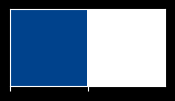

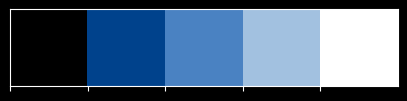

In [20]:
fcp_v1 = ["#00428C", "#FFFFFF"]
sns.palplot(sns.color_palette(fcp_v1))
fcp_v2 = ["#000000", "#00428C", "#4a82c2", "#a2c1e0", "#FFFFFF"]
sns.palplot(sns.color_palette(fcp_v2))

##### Plotting the visualization

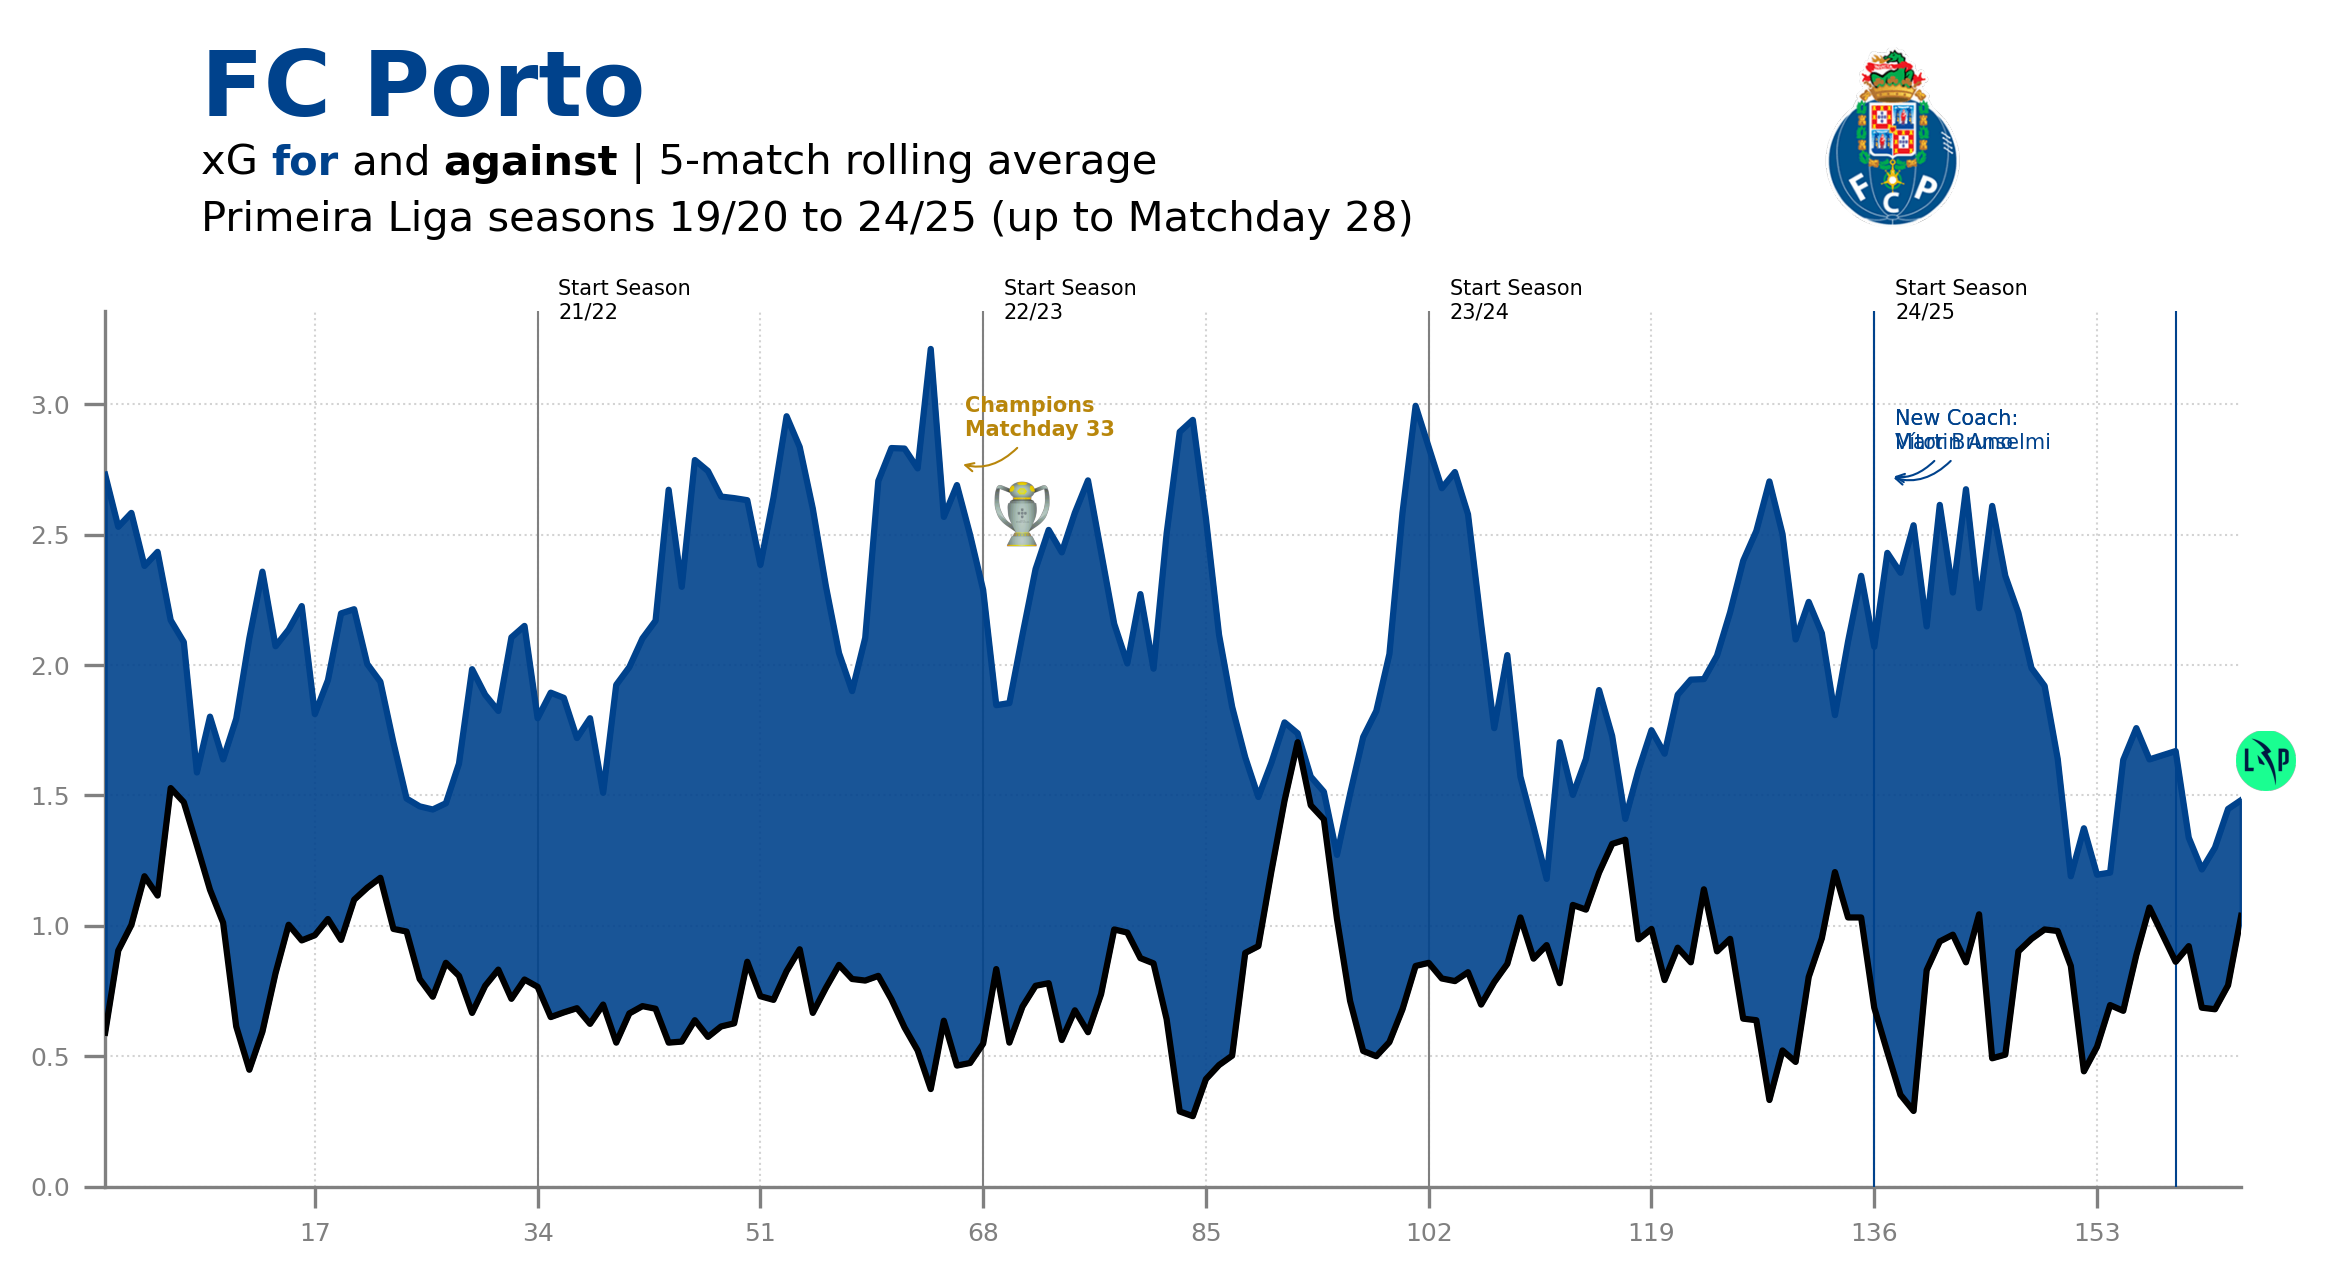

In [ ]:
# ------------------------------
# IMPORTS
# ------------------------------
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen
from PIL import Image
import matplotlib.ticker as ticker
from highlight_text import fig_text

# ------------------------------
# FIGURE SETUP
# ------------------------------
fig = plt.figure(figsize=(8, 4), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

# Spine and grid styling
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")
ax.grid(visible=True, lw=0.5, ls=":", color="lightgrey", zorder=1)

# ------------------------------
# DATA PLOTTING
# ------------------------------
matchdays = range(1, 165)
line_1 = ax.plot(matchdays, Y_for, color="#00428C", zorder=4)  # xG for
line_2 = ax.plot(matchdays, Y_ag, color="#000000", zorder=4)  # xG against

# Axis limits
ax.set_xlim(1, len(Y_for))
ax.set_ylim(0)

# ------------------------------
# SEASON MARKERS
# ------------------------------
SEASON_BREAKS = [34, 68, 102, 136, 170]
SEASON_ANNOTATIONS = [
    (34, 3.25, "Start Season\n21/22"),
    (68, 3.25, "Start Season\n22/23"),
    (102, 3.25, "Start Season\n23/24"),
    (136, 3.25, "Start Season\n24/25"),
]

COACH_ANNOTATIONS = [
    (136, 2.75, "New Coach:\nVítor Bruno", line_1[0].get_color()),
    (159, 2.75, "New Coach:\nMartin Anselmi", line_1[0].get_color()),
]

# Vertical season dividers
for x in SEASON_BREAKS:
    ax.plot(
        [x, x],
        [ax.get_ylim()[0], ax.get_ylim()[1]],
        ls="-",
        lw=0.5,
        color="grey",
        zorder=3,
    )

# Vertical coach change dividers
for x_val, _, _, color in COACH_ANNOTATIONS:
    ax.plot(
        [x_val, x_val],
        [ax.get_ylim()[0], ax.get_ylim()[1]],
        ls="-",
        lw=0.5,
        color=color,
        zorder=3,
    )

# ------------------------------
# ANNOTATIONS
# ------------------------------
ARROW_STYLE = dict(
    arrowstyle="->",
    shrinkA=0,
    shrinkB=5,
    linewidth=0.5,
    connectionstyle="angle3,angleA=60,angleB=-30",
)

# Season start labels
for x, y, text in SEASON_ANNOTATIONS:
    ax.annotate(
        text=text,
        xy=(x, y),
        xytext=(5, 5),
        textcoords="offset points",
        size=5,
        color="black",
        arrowprops=ARROW_STYLE,
        zorder=4,
    )

# Coach labels
for x_val, y, text, color in COACH_ANNOTATIONS:
    ax.annotate(
        text=text,
        xy=(x, y),
        xytext=(5, 5),
        textcoords="offset points",
        size=5,
        color=color,
        arrowprops={**ARROW_STYLE, "color": color},
        zorder=4,
    )

# Championship annotation
ax.annotate(
    xy=(65, 2.8),
    xytext=(5, 5),
    textcoords="offset points",
    text="Champions\nMatchday 33",
    size=5,
    color="#B8860B",
    weight="bold",
    arrowprops=dict(
        arrowstyle="->",
        shrinkA=0,
        shrinkB=5,
        color="#B8860B",
        linewidth=0.5,
        connectionstyle="angle3,angleA=60,angleB=-30",
    ),
    zorder=4,
)

# ------------------------------
# FILL BETWEEN AREAS
# ------------------------------
ax.fill_between(
    matchdays,
    Y_ag["Value"],
    Y_for["Value"],
    where=Y_for["Value"] > Y_ag["Value"],
    interpolate=True,
    alpha=0.90,
    zorder=3,
    color=line_1[0].get_color(),
)

ax.fill_between(
    matchdays,
    Y_ag["Value"],
    Y_for["Value"],
    where=Y_ag["Value"] > Y_for["Value"],
    interpolate=True,
    alpha=0.90,
    color=line_2[0].get_color(),
    zorder=3,
)

# ------------------------------
# TICK FORMATTING
# ------------------------------
ax.tick_params(
    color="grey", length=5, which="major", labelsize=6, labelcolor="grey", zorder=3
)
ax.xaxis.set_major_locator(ticker.MultipleLocator(17))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# ------------------------------
# TITLES & TEXT
# ------------------------------
fig_text(
    x=0.12,
    y=1.1,
    s="FC Porto",
    color=line_1[0].get_color(),
    weight="bold",
    size=22,
    annotationbbox_kw={"xycoords": "figure fraction"},
)

fig_text(
    x=0.12,
    y=1.02,
    s="xG <for> and <against> | 5-match rolling average \nPrimeira Liga seasons 19/20 to 24/25 (up to Matchday 28)",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"},
    ],
    color="black",
    size=10,
    annotationbbox_kw={"xycoords": "figure fraction"},
)


# ------------------------------
# LOGO PLACEMENT
# ------------------------------
def data_to_fig_coords(ax, x_data, y_data, fig):
    """Convert data coordinates to figure coordinates [0-1 range]"""
    display_coords = ax.transData.transform((x_data, y_data))
    fig_width, fig_height = fig.get_size_inches() * fig.dpi
    return display_coords[0] / fig_width, display_coords[1] / fig_height


def add_logo(fig, image, x_pos, y_pos, width=0.05, height=0.05):
    """Helper to add logos at specified positions"""
    logo_ax = fig.add_axes([x_pos, y_pos, width, height], zorder=4)
    logo_ax.imshow(image, extent=[0.25, 0.75, 0.25, 0.75])
    logo_ax.axis("off")


# Load logos
team_logo = Image.open(
    urlopen("https://images.fotmob.com/image_resources/logo/teamlogo/9773.png")
)
competition_logo = Image.open(
    urlopen("https://images.fotmob.com/image_resources/logo/leaguelogo/61.png")
)
trophy_logo = Image.open(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\Main level\media\Primeira_Liga_Trophy.png" # This can be downloaded here, yu just need to then convert to png: https://upload.wikimedia.org/wikipedia/commons/e/e8/Primeira_Liga_Trophy.svg. Also, remeber to change this for the remaining cells 
)

# Calculate logo positions
fig_rel_x, fig_rel_y = data_to_fig_coords(
    ax, float(X.iloc[163]), float(Y_for["Value"].iloc[163]), fig
)
trophy_fig_rel_x, trophy_fig_rel_y = data_to_fig_coords(
    ax, float(X.iloc[66]), float(Y_for["Value"].iloc[66]), fig
)

# Add logos
add_logo(fig, team_logo, 0.75, 0.95, 0.15, 0.15)  # Top-right
add_logo(fig, competition_logo, fig_rel_x + 0.06, fig_rel_y + 0.03)  # Last data point
add_logo(
    fig, trophy_logo, trophy_fig_rel_x, trophy_fig_rel_y, 0.055, 0.055
)  # Championship point


# ------------------------------
# SAFE LAYOUT ADJUSTMENT (Avoids warning)
# ------------------------------
def auto_adjust_layout(fig, top=0.88, bottom=0.15, left=0.08, right=0.97):
    """
    Ajusta margens de forma segura, evitando problemas com add_axes.
    """
    fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right)


auto_adjust_layout(fig)

# ------------------------------
# FINAL SAVE
# ------------------------------
fig.savefig(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\media\5 Rolling Averages\xG_Porto_5Rolling_Average_1920_2425.jpg",
    transparent=True,
    bbox_inches="tight",
    dpi=300,
)


### Accurate Passes

#### Variable Selection

In [23]:
variable_for = "Accurate Passes for"
variable_ag = "Accurate Passes ag"

#### Rolling metrics calculation

In [24]:
# xG conceded and xG created
Y_for = primeira_liga_1920_2425[
    primeira_liga_1920_2425["Variable"] == variable_for
].reset_index(drop=True)
Y_ag = primeira_liga_1920_2425[
    primeira_liga_1920_2425["Variable"] == variable_ag
].reset_index(drop=True)
X = pd.Series(range(len(Y_for)))

# compute the rolling average (min_periods is used for the partial average)
# here we're using a 10 game rolling average
Y_for["Value"] = Y_for["Value"].rolling(window=5, min_periods=0).mean()
Y_ag["Value"] = Y_ag["Value"].rolling(window=5, min_periods=0).mean()

Y_for = Y_for[["Value"]].reset_index(drop=True)
Y_ag = Y_ag[["Value"]].reset_index(drop=True)

display(Y_for.head())
display(Y_ag.head())

,Value
0,370.000000
1,380.500000
2,438.333333
3,390.250000
4,403.200000


,Value
0,321.000000
1,286.000000
2,224.666667
3,247.000000
4,255.200000


#### Accurate passes Data Viz

##### Color selection

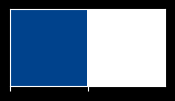

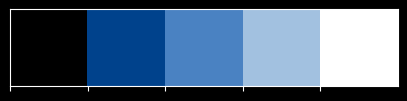

In [25]:
fcp_v1 = ["#00428C", "#FFFFFF"]
sns.palplot(sns.color_palette(fcp_v1))
fcp_v2 = ["#000000", "#00428C", "#4a82c2", "#a2c1e0", "#FFFFFF"]
sns.palplot(sns.color_palette(fcp_v2))

##### Plotting the visualization

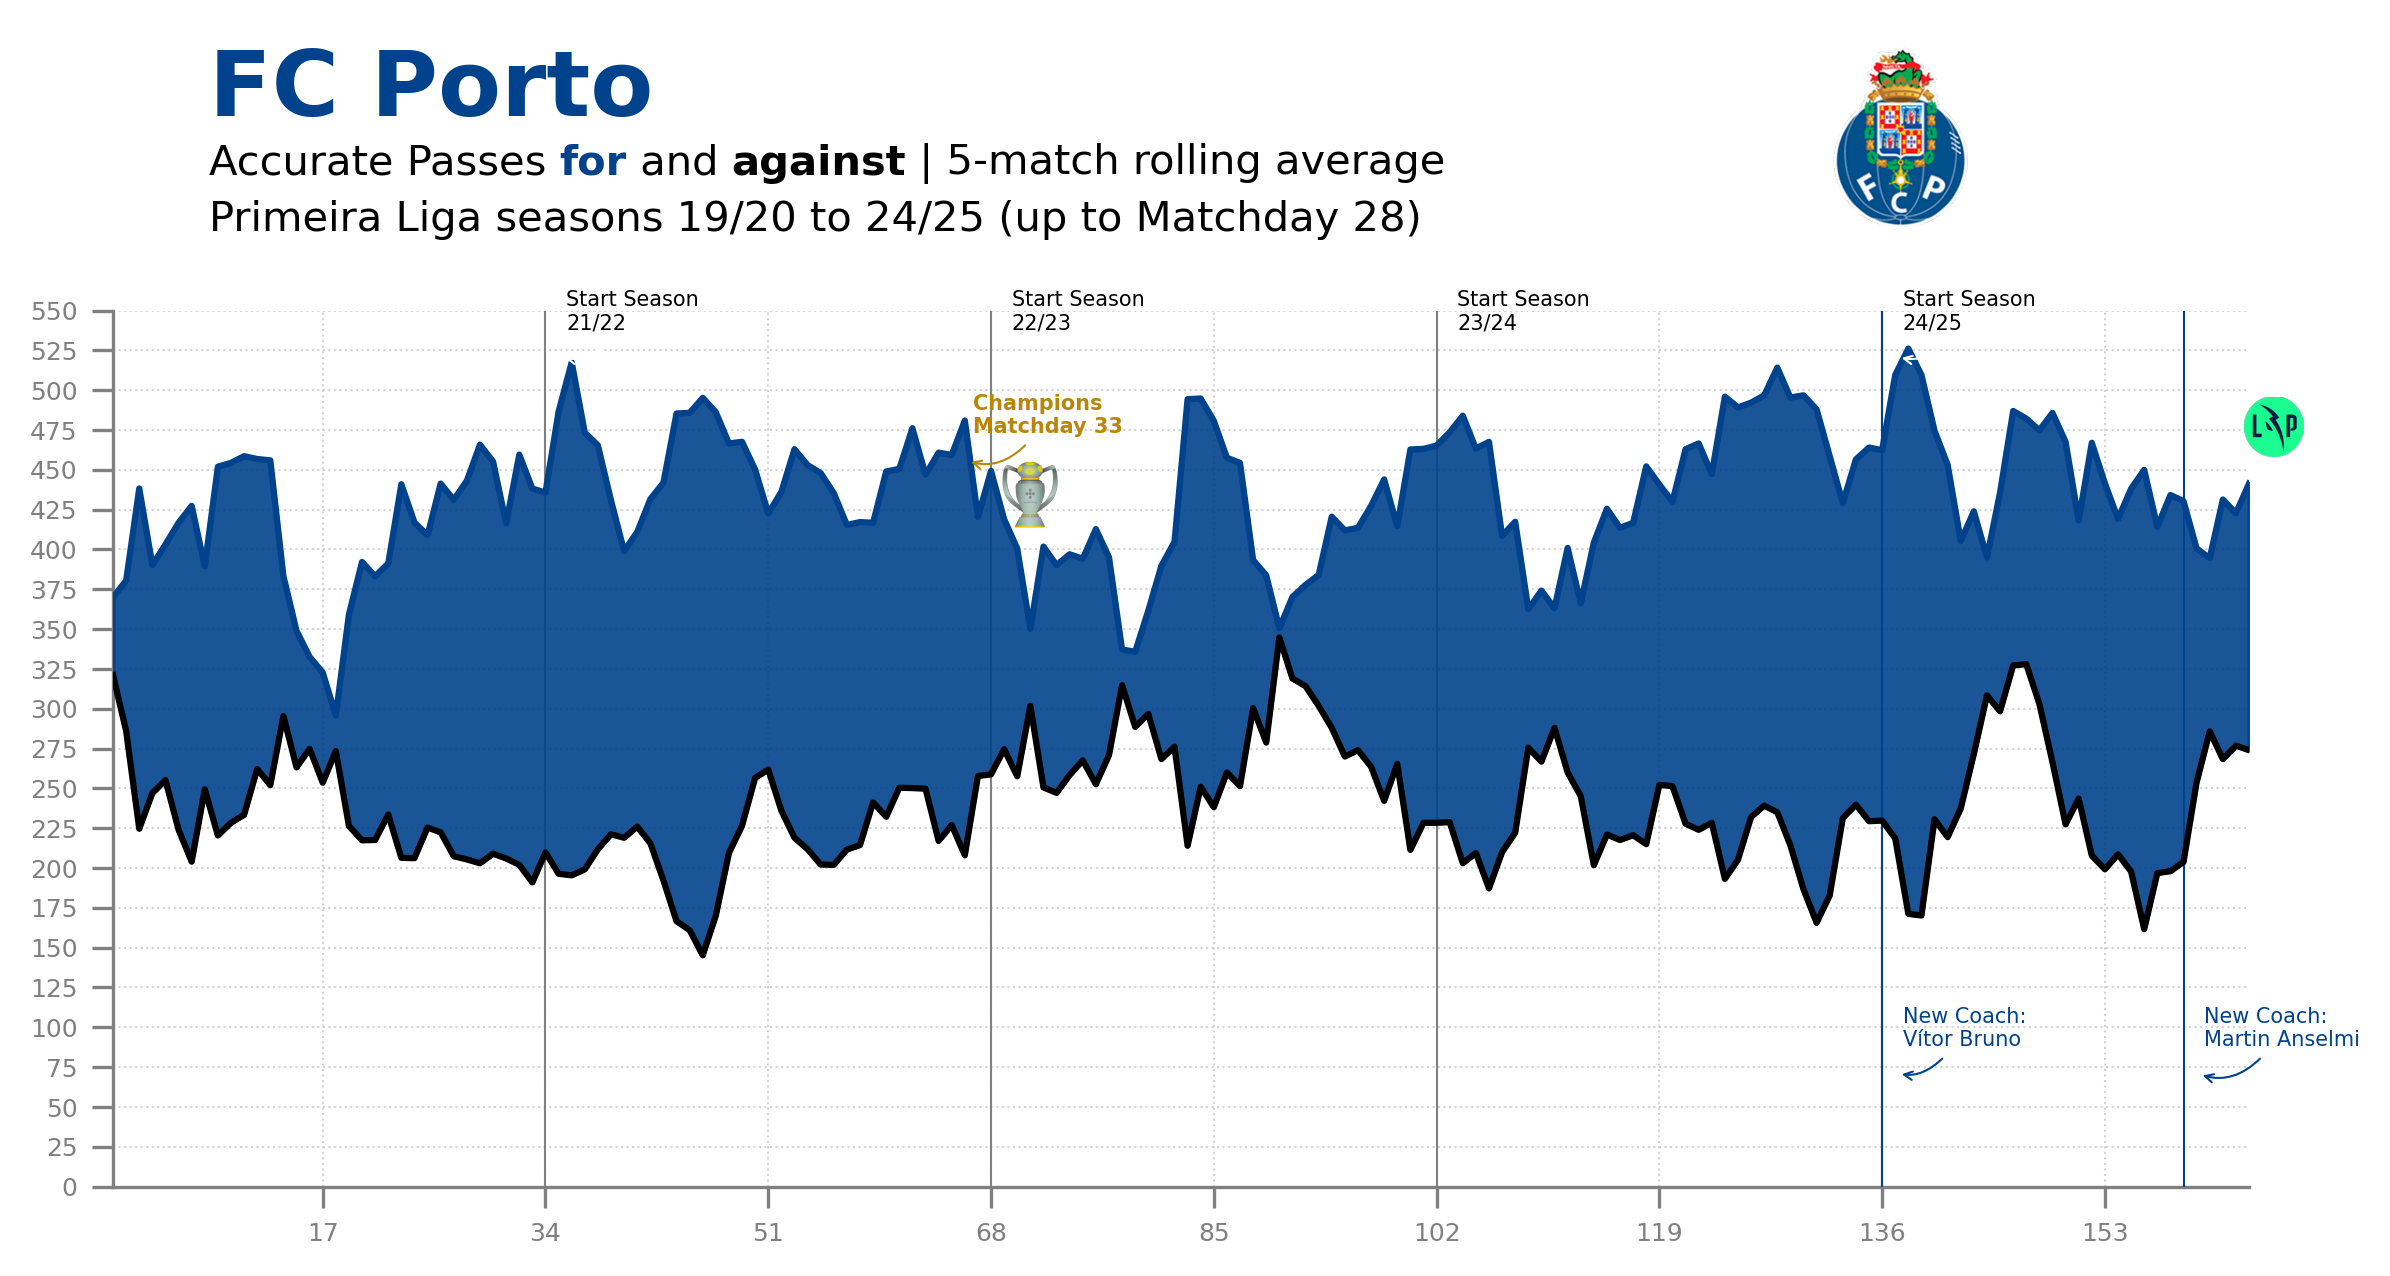

In [26]:
# ------------------------------
# IMPORTS
# ------------------------------
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen
from PIL import Image
import matplotlib.ticker as ticker
from highlight_text import fig_text

# ------------------------------
# FIGURE SETUP
# ------------------------------
fig = plt.figure(figsize=(8, 4), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

# Spine and grid styling
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")
ax.grid(visible=True, lw=0.5, ls=":", color="lightgrey", zorder=1)

# ------------------------------
# DATA PLOTTING
# ------------------------------
matchdays = range(1, 165)
line_1 = ax.plot(matchdays, Y_for, color="#00428C", zorder=4)  # Accurate Passes for
line_2 = ax.plot(matchdays, Y_ag, color="#000000", zorder=4)  # Accurate Passes against

# Axis limits
ax.set_xlim(1, len(Y_for))
ax.set_ylim(0, 550)


# ------------------------------
# SEASON MARKERS
# ------------------------------
SEASON_BREAKS = [34, 68, 102, 136, 170]
SEASON_ANNOTATIONS = [
    (34, 525, "Start Season\n21/22"),
    (68, 525, "Start Season\n22/23"),
    (102, 525, "Start Season\n23/24"),
    (136, 525, "Start Season\n24/25"),
]

COACH_ANNOTATIONS = [
    (136, 75, "New Coach:\nVítor Bruno", line_1[0].get_color()),
    (159, 75, "New Coach:\nMartin Anselmi", line_1[0].get_color()),
]

# Vertical season dividers
for x in SEASON_BREAKS:
    ax.plot(
        [x, x],
        [ax.get_ylim()[0], ax.get_ylim()[1]],
        ls="-",
        lw=0.5,
        color="grey",
        zorder=3,
    )

# Vertical coach change dividers
for x_val, _, _, color in COACH_ANNOTATIONS:
    ax.plot(
        [x_val, x_val],
        [ax.get_ylim()[0], ax.get_ylim()[1]],
        ls="-",
        lw=0.5,
        color=color,
        zorder=3,
    )

# ------------------------------
# ANNOTATIONS
# ------------------------------
ARROW_STYLE = dict(
    arrowstyle="->",
    shrinkA=0,
    shrinkB=5,
    linewidth=0.5,
    connectionstyle="angle3,angleA=60,angleB=-30",
    zorder=4,
)

# Season start labels
for x, y, text in SEASON_ANNOTATIONS:
    ax.annotate(
        text=text,
        xy=(x, y),
        xytext=(5, 5),
        textcoords="offset points",
        size=5,
        color="black",
        arrowprops=ARROW_STYLE,
        zorder=4,
    )

# Coach labels
for x, y, text, color in COACH_ANNOTATIONS:
    ax.annotate(
        text=text,
        xy=(x, y),
        xytext=(5, 5),
        textcoords="offset points",
        size=5,
        color=color,
        arrowprops={**ARROW_STYLE, "color": color},
        zorder=4,
    )

# Championship annotation
ax.annotate(
    xy=(65, 460),
    xytext=(5, 5),
    textcoords="offset points",
    text="Champions\nMatchday 33",
    size=5,
    color="#B8860B",
    weight="bold",
    arrowprops=dict(
        arrowstyle="->",
        shrinkA=0,
        shrinkB=5,
        color="#B8860B",
        linewidth=0.5,
        connectionstyle="angle3,angleA=60,angleB=-30",
    ),
    zorder=4,
)

# ------------------------------
# FILL BETWEEN AREAS
# ------------------------------
ax.fill_between(
    matchdays,
    Y_ag["Value"],
    Y_for["Value"],
    where=Y_for["Value"] > Y_ag["Value"],
    interpolate=True,
    alpha=0.90,
    zorder=3,
    color=line_1[0].get_color(),
)

ax.fill_between(
    matchdays,
    Y_ag["Value"],
    Y_for["Value"],
    where=Y_ag["Value"] > Y_for["Value"],
    interpolate=True,
    alpha=0.90,
    color=line_2[0].get_color(),
    zorder=3,
)

# ------------------------------
# TICK FORMATTING
# ------------------------------
ax.tick_params(
    color="grey", length=5, which="major", labelsize=6, labelcolor="grey", zorder=3
)
ax.xaxis.set_major_locator(ticker.MultipleLocator(17))
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))

# ------------------------------
# TITLES & TEXT
# ------------------------------
fig_text(
    x=0.12,
    y=1.1,
    s="FC Porto",
    color=line_1[0].get_color(),
    weight="bold",
    size=22,
    annotationbbox_kw={"xycoords": "figure fraction"},
)

fig_text(
    x=0.12,
    y=1.02,
    s="Accurate Passes <for> and <against> | 5-match rolling average \nPrimeira Liga seasons 19/20 to 24/25 (up to Matchday 28)",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"},
    ],
    color="black",
    size=10,
    annotationbbox_kw={"xycoords": "figure fraction"},
)


# ------------------------------
# LOGO PLACEMENT
# ------------------------------
def data_to_fig_coords(ax, x_data, y_data, fig):
    """Convert data coordinates to figure coordinates [0-1 range]"""
    display_coords = ax.transData.transform((x_data, y_data))
    fig_width, fig_height = fig.get_size_inches() * fig.dpi
    return display_coords[0] / fig_width, display_coords[1] / fig_height


def add_logo(fig, image, x_pos, y_pos, width=0.05, height=0.05):
    """Helper to add logos at specified positions"""
    logo_ax = fig.add_axes([x_pos, y_pos, width, height], zorder=4)
    logo_ax.imshow(image, extent=[0.25, 0.75, 0.25, 0.75])
    logo_ax.axis("off")


# Load logos
team_logo = Image.open(
    urlopen("https://images.fotmob.com/image_resources/logo/teamlogo/9773.png")
)
competition_logo = Image.open(
    urlopen("https://images.fotmob.com/image_resources/logo/leaguelogo/61.png")
)
trophy_logo = Image.open(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\Main level\media\Primeira_Liga_Trophy.png"
)

# Calculate logo positions
fig_rel_x, fig_rel_y = data_to_fig_coords(
    ax, float(X.iloc[163]), float(Y_for["Value"].iloc[163]), fig
)
trophy_fig_rel_x, trophy_fig_rel_y = data_to_fig_coords(
    ax, float(X.iloc[66]), float(Y_for["Value"].iloc[66]), fig
)

# Add logos
add_logo(fig, team_logo, 0.75, 0.95, 0.15, 0.15)  # Top-right
add_logo(fig, competition_logo, fig_rel_x + 0.06, fig_rel_y + 0.03)  # Last data point
add_logo(
    fig, trophy_logo, trophy_fig_rel_x, trophy_fig_rel_y, 0.055, 0.055
)  # Championship point


# ------------------------------
# SAFE LAYOUT ADJUSTMENT (Avoids warning)
# ------------------------------
def auto_adjust_layout(fig, top=0.88, bottom=0.15, left=0.08, right=0.97):
    """
    Ajusta margens de forma segura, evitando problemas com add_axes.
    """
    fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right)


auto_adjust_layout(fig)

# ------------------------------
# FINAL SAVE
# ------------------------------
fig.savefig(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\media\5 Rolling Averages\Accurate_Passes_Porto_5Rolling_Average_1920_2425.jpg",
    transparent=True,
    bbox_inches="tight",
    dpi=300,
)


### Ball Possession

#### Variable Selection

In [27]:
variable_for = "Ball Possession for"
variable_ag = "Ball Possession ag"

#### Rolling metrics calculation

In [28]:
# xG conceded and xG created
Y_for = primeira_liga_1920_2425[
    primeira_liga_1920_2425["Variable"] == variable_for
].reset_index(drop=True)
Y_ag = primeira_liga_1920_2425[
    primeira_liga_1920_2425["Variable"] == variable_ag
].reset_index(drop=True)
X = pd.Series(range(len(Y_for)))

# compute the rolling average (min_periods is used for the partial average)
# here we're using a 10 game rolling average
Y_for["Value"] = Y_for["Value"].rolling(window=5, min_periods=0).mean()
Y_ag["Value"] = Y_ag["Value"].rolling(window=5, min_periods=0).mean()

Y_for = Y_for[["Value"]].reset_index(drop=True)
Y_ag = Y_ag[["Value"]].reset_index(drop=True)

display(Y_for.head())
display(Y_ag.head())

,Value
0,53.000000
1,56.000000
2,63.333333
3,58.750000
4,58.800000


,Value
0,47.000000
1,44.000000
2,36.666667
3,41.250000
4,41.200000


#### Accurate passes Data Viz

##### Color selection

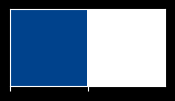

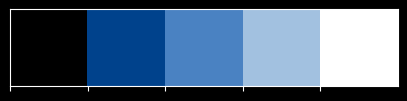

In [29]:
fcp_v1 = ["#00428C", "#FFFFFF"]
sns.palplot(sns.color_palette(fcp_v1))
fcp_v2 = ["#000000", "#00428C", "#4a82c2", "#a2c1e0", "#FFFFFF"]
sns.palplot(sns.color_palette(fcp_v2))

##### Plotting the visualization

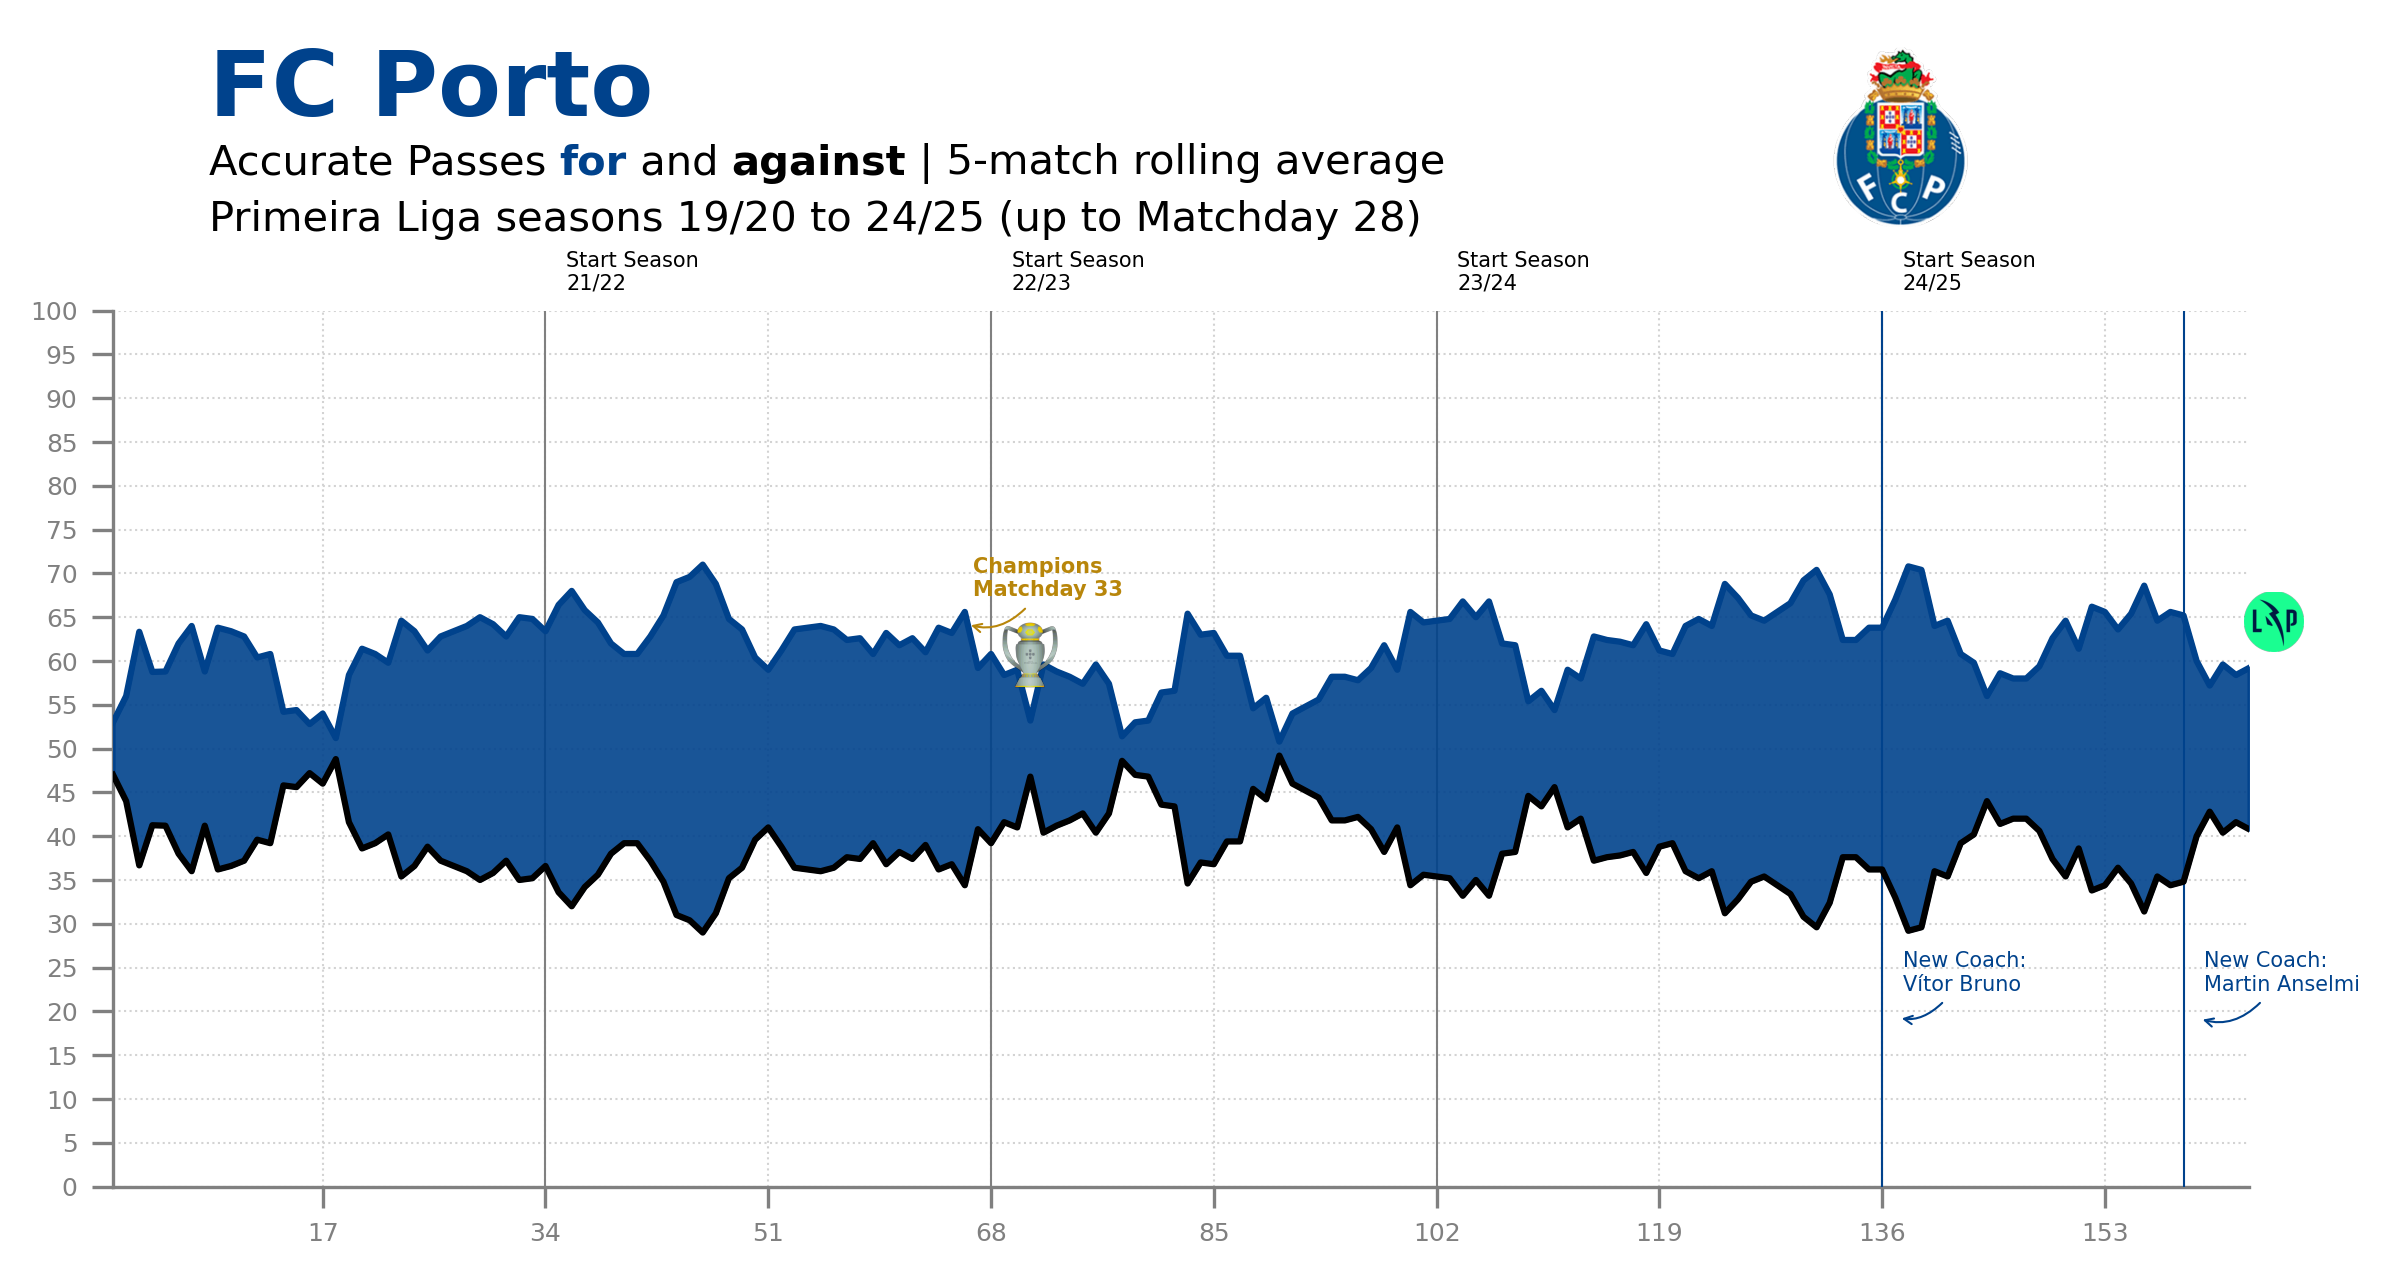

In [30]:
# ------------------------------
# IMPORTS
# ------------------------------
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen
from PIL import Image
import matplotlib.ticker as ticker
from highlight_text import fig_text

# ------------------------------
# FIGURE SETUP
# ------------------------------
fig = plt.figure(figsize=(8, 4), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

# Spine and grid styling
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")
ax.grid(visible=True, lw=0.5, ls=":", color="lightgrey", zorder=1)

# ------------------------------
# DATA PLOTTING
# ------------------------------
matchdays = range(1, 165)
line_1 = ax.plot(matchdays, Y_for, color="#00428C", zorder=4)  # Accurate Passes for
line_2 = ax.plot(matchdays, Y_ag, color="#000000", zorder=4)  # Accurate Passes against

# Axis limits
ax.set_xlim(1, len(Y_for))
ax.set_ylim(0, 100)


# ------------------------------
# SEASON MARKERS
# ------------------------------
SEASON_BREAKS = [34, 68, 102, 136, 170]
SEASON_ANNOTATIONS = [
    (34, 100, "Start Season\n21/22"),
    (68, 100, "Start Season\n22/23"),
    (102, 100, "Start Season\n23/24"),
    (136, 100, "Start Season\n24/25"),
]

COACH_ANNOTATIONS = [
    (136, 20, "New Coach:\nVítor Bruno", line_1[0].get_color()),
    (159, 20, "New Coach:\nMartin Anselmi", line_1[0].get_color()),
]

# Vertical season dividers
for x in SEASON_BREAKS:
    ax.plot(
        [x, x],
        [ax.get_ylim()[0], ax.get_ylim()[1]],
        ls="-",
        lw=0.5,
        color="grey",
        zorder=3,
    )

# Vertical coach change dividers
for x_val, _, _, color in COACH_ANNOTATIONS:
    ax.plot(
        [x_val, x_val],
        [ax.get_ylim()[0], ax.get_ylim()[1]],
        ls="-",
        lw=0.5,
        color=color,
        zorder=3,
    )

# ------------------------------
# ANNOTATIONS
# ------------------------------
ARROW_STYLE = dict(
    arrowstyle="->",
    shrinkA=0,
    shrinkB=5,
    linewidth=0.5,
    connectionstyle="angle3,angleA=60,angleB=-30",
    zorder=4,
)

# Season start labels
for x, y, text in SEASON_ANNOTATIONS:
    ax.annotate(
        text=text,
        xy=(x, y),
        xytext=(5, 5),
        textcoords="offset points",
        size=5,
        color="black",
        arrowprops=ARROW_STYLE,
        zorder=4,
    )

# Coach labels
for x, y, text, color in COACH_ANNOTATIONS:
    ax.annotate(
        text=text,
        xy=(x, y),
        xytext=(5, 5),
        textcoords="offset points",
        size=5,
        color=color,
        arrowprops={**ARROW_STYLE, "color": color},
        zorder=4,
    )

# Championship annotation
ax.annotate(
    xy=(65, 65),
    xytext=(5, 5),
    textcoords="offset points",
    text="Champions\nMatchday 33",
    size=5,
    color="#B8860B",
    weight="bold",
    arrowprops=dict(
        arrowstyle="->",
        shrinkA=0,
        shrinkB=5,
        color="#B8860B",
        linewidth=0.5,
        connectionstyle="angle3,angleA=60,angleB=-30",
    ),
    zorder=4,
)

# ------------------------------
# FILL BETWEEN AREAS
# ------------------------------
ax.fill_between(
    matchdays,
    Y_ag["Value"],
    Y_for["Value"],
    where=Y_for["Value"] > Y_ag["Value"],
    interpolate=True,
    alpha=0.90,
    zorder=3,
    color=line_1[0].get_color(),
)

ax.fill_between(
    matchdays,
    Y_ag["Value"],
    Y_for["Value"],
    where=Y_ag["Value"] > Y_for["Value"],
    interpolate=True,
    alpha=0.90,
    color=line_2[0].get_color(),
    zorder=3,
)

# ------------------------------
# TICK FORMATTING
# ------------------------------
ax.tick_params(
    color="grey", length=5, which="major", labelsize=6, labelcolor="grey", zorder=3
)
ax.xaxis.set_major_locator(ticker.MultipleLocator(17))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# ------------------------------
# TITLES & TEXT
# ------------------------------
fig_text(
    x=0.12,
    y=1.1,
    s="FC Porto",
    color=line_1[0].get_color(),
    weight="bold",
    size=22,
    annotationbbox_kw={"xycoords": "figure fraction"},
)

fig_text(
    x=0.12,
    y=1.02,
    s="Accurate Passes <for> and <against> | 5-match rolling average \nPrimeira Liga seasons 19/20 to 24/25 (up to Matchday 28)",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"},
    ],
    color="black",
    size=10,
    annotationbbox_kw={"xycoords": "figure fraction"},
)


# ------------------------------
# LOGO PLACEMENT
# ------------------------------
def data_to_fig_coords(ax, x_data, y_data, fig):
    """Convert data coordinates to figure coordinates [0-1 range]"""
    display_coords = ax.transData.transform((x_data, y_data))
    fig_width, fig_height = fig.get_size_inches() * fig.dpi
    return display_coords[0] / fig_width, display_coords[1] / fig_height


def add_logo(fig, image, x_pos, y_pos, width=0.05, height=0.05):
    """Helper to add logos at specified positions"""
    logo_ax = fig.add_axes([x_pos, y_pos, width, height], zorder=4)
    logo_ax.imshow(image, extent=[0.25, 0.75, 0.25, 0.75])
    logo_ax.axis("off")


# Load logos
team_logo = Image.open(
    urlopen("https://images.fotmob.com/image_resources/logo/teamlogo/9773.png")
)
competition_logo = Image.open(
    urlopen("https://images.fotmob.com/image_resources/logo/leaguelogo/61.png")
)
trophy_logo = Image.open(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\Main level\media\Primeira_Liga_Trophy.png"
)

# Calculate logo positions
fig_rel_x, fig_rel_y = data_to_fig_coords(
    ax, float(X.iloc[163]), float(Y_for["Value"].iloc[163]), fig
)
trophy_fig_rel_x, trophy_fig_rel_y = data_to_fig_coords(
    ax, float(X.iloc[66]), float(Y_for["Value"].iloc[66]), fig
)

# Add logos
add_logo(fig, team_logo, 0.75, 0.95, 0.15, 0.15)  # Top-right
add_logo(fig, competition_logo, fig_rel_x + 0.06, fig_rel_y + 0.03)  # Last data point
add_logo(
    fig, trophy_logo, trophy_fig_rel_x, trophy_fig_rel_y, 0.055, 0.055
)  # Championship point


# ------------------------------
# SAFE LAYOUT ADJUSTMENT (Avoids warning)
# ------------------------------
def auto_adjust_layout(fig, top=0.88, bottom=0.15, left=0.08, right=0.97):
    """
    Ajusta margens de forma segura, evitando problemas com add_axes.
    """
    fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right)


auto_adjust_layout(fig)

# ------------------------------
# FINAL SAVE
# ------------------------------
fig.savefig(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\media\5 Rolling Averages\Ball_Possession_Porto_5Rolling_Average_1920_2425.jpg",
    transparent=True,
    bbox_inches="tight",
    dpi=300,
)


### Shot On Target

#### Variable Selection

In [31]:
variable_for = "Shots On Target for"
variable_ag = "Shots On Target ag"

#### Rolling metrics calculation

In [32]:
# xG conceded and xG created
Y_for = primeira_liga_1920_2425[
    primeira_liga_1920_2425["Variable"] == variable_for
].reset_index(drop=True)
Y_ag = primeira_liga_1920_2425[
    primeira_liga_1920_2425["Variable"] == variable_ag
].reset_index(drop=True)
X = pd.Series(range(len(Y_for)))

# compute the rolling average (min_periods is used for the partial average)
# here we're using a 10 game rolling average
Y_for["Value"] = Y_for["Value"].rolling(window=5, min_periods=0).mean()
Y_ag["Value"] = Y_ag["Value"].rolling(window=5, min_periods=0).mean()

Y_for = Y_for[["Value"]].reset_index(drop=True)
Y_ag = Y_ag[["Value"]].reset_index(drop=True)

display(Y_for.head())
display(Y_ag.head())

,Value
0,4.000000
1,5.000000
2,6.666667
3,6.250000
4,6.400000


,Value
0,1.0
1,2.5
2,3.0
3,3.5
4,3.2


#### Accurate passes Data Viz

##### Color selection

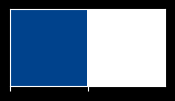

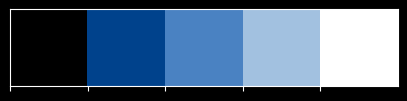

In [33]:
fcp_v1 = ["#00428C", "#FFFFFF"]
sns.palplot(sns.color_palette(fcp_v1))
fcp_v2 = ["#000000", "#00428C", "#4a82c2", "#a2c1e0", "#FFFFFF"]
sns.palplot(sns.color_palette(fcp_v2))

##### Plotting the visualization

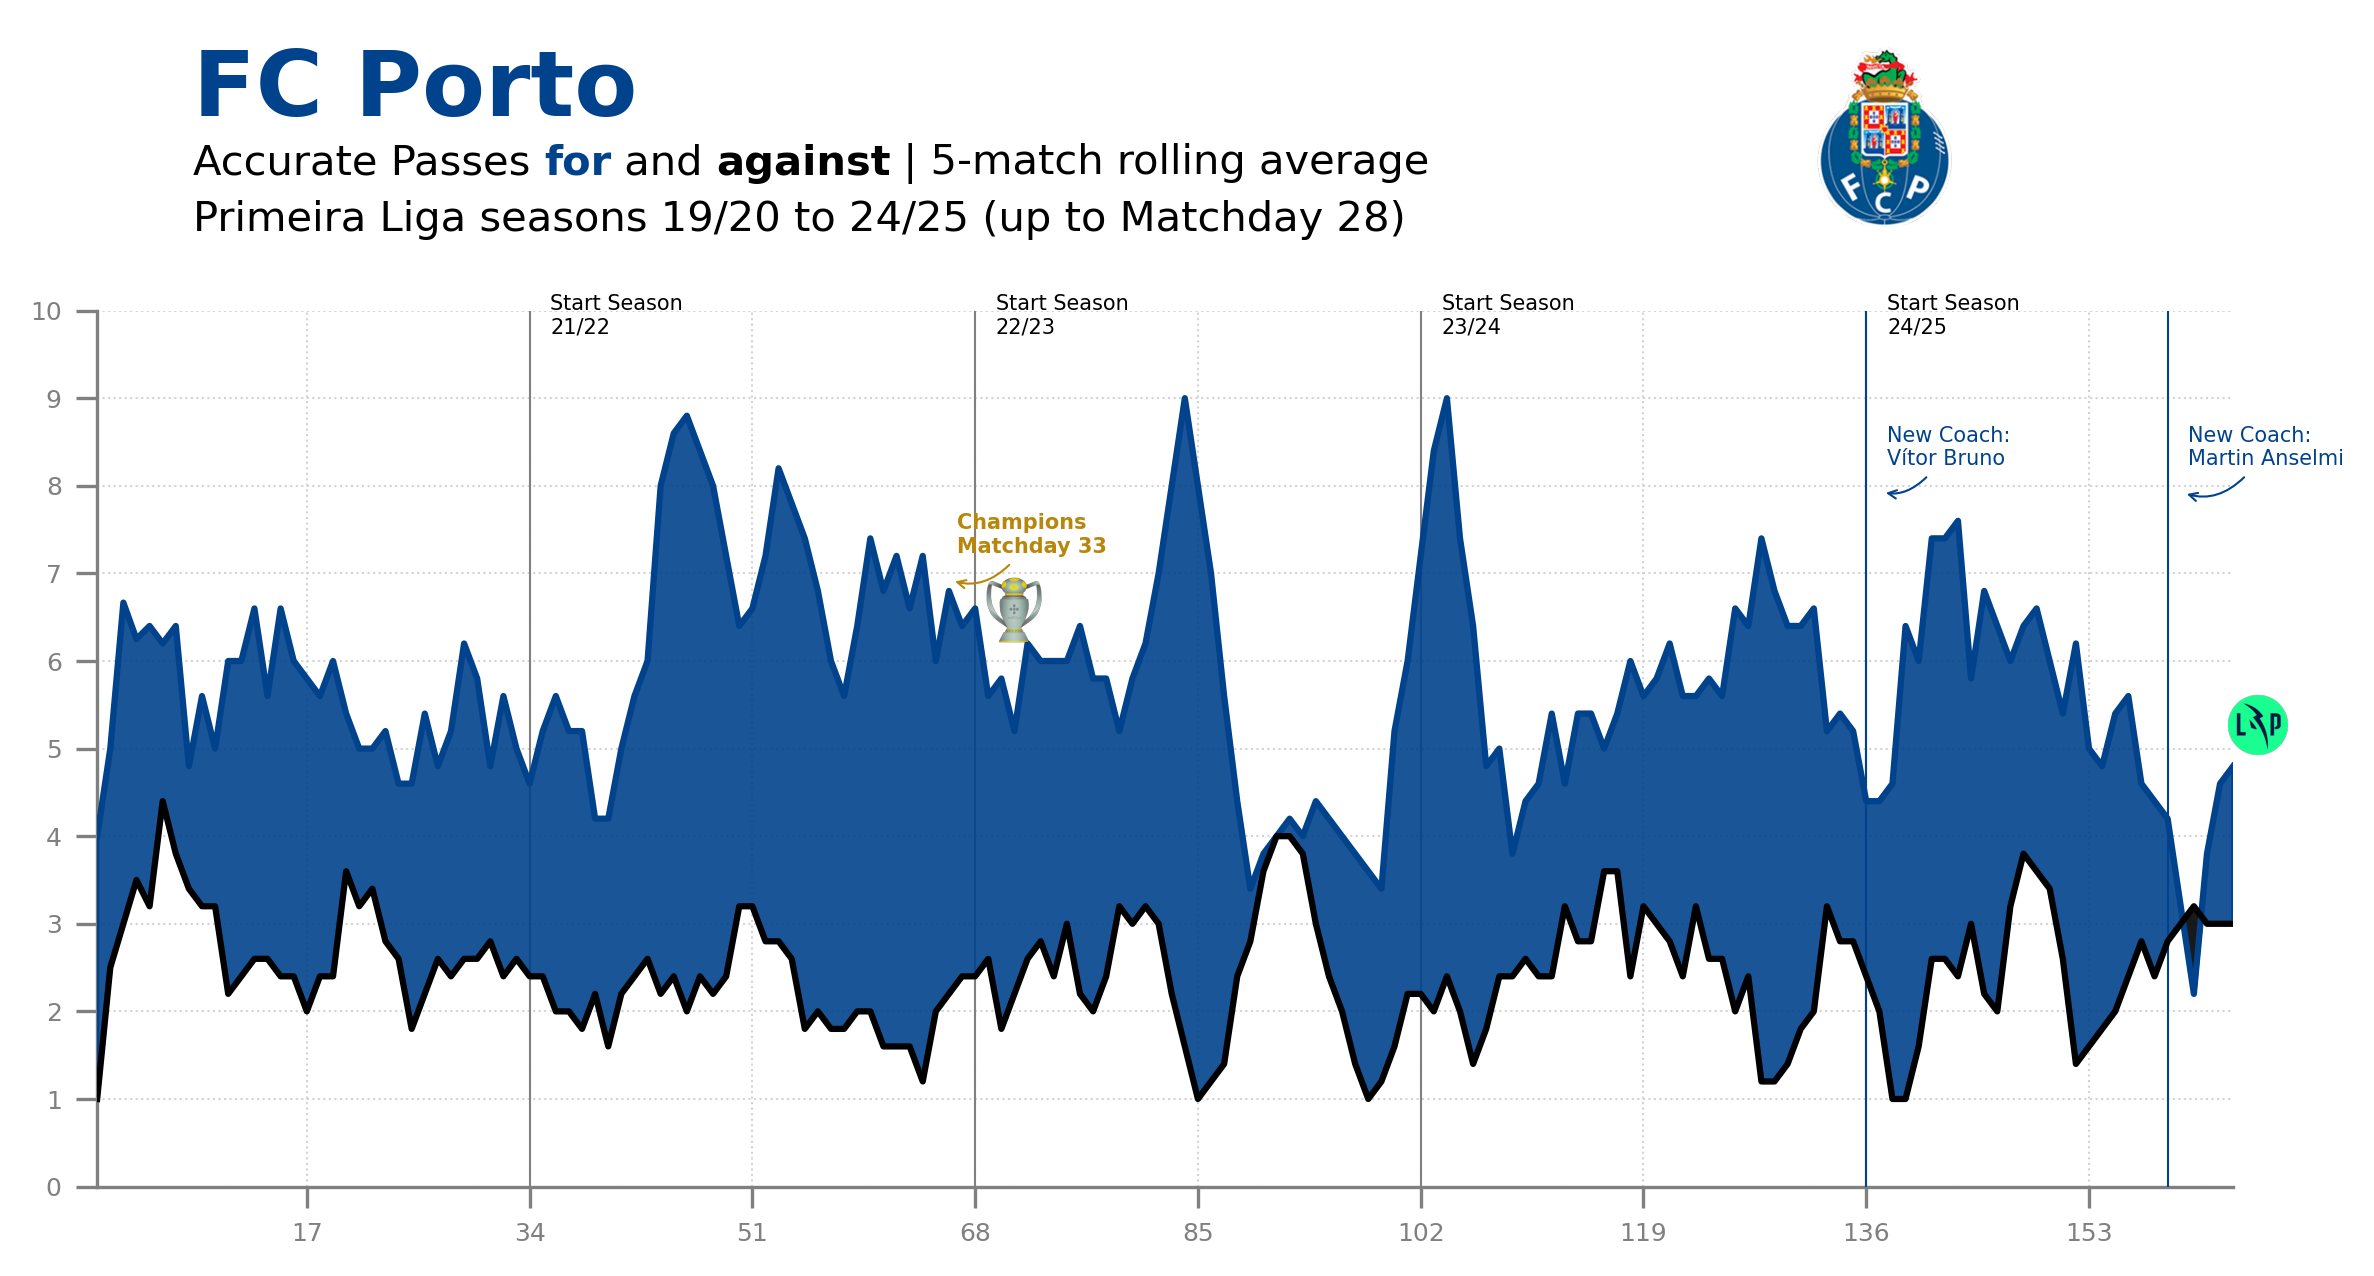

In [34]:
# ------------------------------
# IMPORTS
# ------------------------------
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen
from PIL import Image
import matplotlib.ticker as ticker
from highlight_text import fig_text

# ------------------------------
# FIGURE SETUP
# ------------------------------
fig = plt.figure(figsize=(8, 4), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

# Spine and grid styling
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")
ax.grid(visible=True, lw=0.5, ls=":", color="lightgrey", zorder=1)

# ------------------------------
# DATA PLOTTING
# ------------------------------
matchdays = range(1, 165)
line_1 = ax.plot(matchdays, Y_for, color="#00428C", zorder=4)  # Accurate Passes for
line_2 = ax.plot(matchdays, Y_ag, color="#000000", zorder=4)  # Accurate Passes against

# Axis limits
ax.set_xlim(1, len(Y_for))
ax.set_ylim(0, 10)


# ------------------------------
# SEASON MARKERS
# ------------------------------
SEASON_BREAKS = [34, 68, 102, 136, 170]
SEASON_ANNOTATIONS = [
    (34, 9.5, "Start Season\n21/22"),
    (68, 9.5, "Start Season\n22/23"),
    (102, 9.5, "Start Season\n23/24"),
    (136, 9.5, "Start Season\n24/25"),
]

COACH_ANNOTATIONS = [
    (136, 8, "New Coach:\nVítor Bruno", line_1[0].get_color()),
    (159, 8, "New Coach:\nMartin Anselmi", line_1[0].get_color()),
]

# Vertical season dividers
for x in SEASON_BREAKS:
    ax.plot(
        [x, x],
        [ax.get_ylim()[0], ax.get_ylim()[1]],
        ls="-",
        lw=0.5,
        color="grey",
        zorder=3,
    )

# Vertical coach change dividers
for x_val, _, _, color in COACH_ANNOTATIONS:
    ax.plot(
        [x_val, x_val],
        [ax.get_ylim()[0], ax.get_ylim()[1]],
        ls="-",
        lw=0.5,
        color=color,
        zorder=3,
    )

# ------------------------------
# ANNOTATIONS
# ------------------------------
ARROW_STYLE = dict(
    arrowstyle="->",
    shrinkA=0,
    shrinkB=5,
    linewidth=0.5,
    connectionstyle="angle3,angleA=60,angleB=-30",
    zorder=4,
)

# Season start labels
for x, y, text in SEASON_ANNOTATIONS:
    ax.annotate(
        text=text,
        xy=(x, y),
        xytext=(5, 5),
        textcoords="offset points",
        size=5,
        color="black",
        arrowprops=ARROW_STYLE,
        zorder=4,
    )

# Coach labels
for x, y, text, color in COACH_ANNOTATIONS:
    ax.annotate(
        text=text,
        xy=(x, y),
        xytext=(5, 5),
        textcoords="offset points",
        size=5,
        color=color,
        arrowprops={**ARROW_STYLE, "color": color},
        zorder=4,
    )

# Championship annotation
ax.annotate(
    xy=(65, 7),
    xytext=(5, 5),
    textcoords="offset points",
    text="Champions\nMatchday 33",
    size=5,
    color="#B8860B",
    weight="bold",
    arrowprops=dict(
        arrowstyle="->",
        shrinkA=0,
        shrinkB=5,
        color="#B8860B",
        linewidth=0.5,
        connectionstyle="angle3,angleA=60,angleB=-30",
    ),
    zorder=4,
)

# ------------------------------
# FILL BETWEEN AREAS
# ------------------------------
ax.fill_between(
    matchdays,
    Y_ag["Value"],
    Y_for["Value"],
    where=Y_for["Value"] > Y_ag["Value"],
    interpolate=True,
    alpha=0.90,
    zorder=3,
    color=line_1[0].get_color(),
)

ax.fill_between(
    matchdays,
    Y_ag["Value"],
    Y_for["Value"],
    where=Y_ag["Value"] > Y_for["Value"],
    interpolate=True,
    alpha=0.90,
    color=line_2[0].get_color(),
    zorder=3,
)

# ------------------------------
# TICK FORMATTING
# ------------------------------
ax.tick_params(
    color="grey", length=5, which="major", labelsize=6, labelcolor="grey", zorder=3
)
ax.xaxis.set_major_locator(ticker.MultipleLocator(17))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ------------------------------
# TITLES & TEXT
# ------------------------------
fig_text(
    x=0.12,
    y=1.1,
    s="FC Porto",
    color=line_1[0].get_color(),
    weight="bold",
    size=22,
    annotationbbox_kw={"xycoords": "figure fraction"},
)

fig_text(
    x=0.12,
    y=1.02,
    s="Accurate Passes <for> and <against> | 5-match rolling average \nPrimeira Liga seasons 19/20 to 24/25 (up to Matchday 28)",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"},
    ],
    color="black",
    size=10,
    annotationbbox_kw={"xycoords": "figure fraction"},
)


# ------------------------------
# LOGO PLACEMENT
# ------------------------------
def data_to_fig_coords(ax, x_data, y_data, fig):
    """Convert data coordinates to figure coordinates [0-1 range]"""
    display_coords = ax.transData.transform((x_data, y_data))
    fig_width, fig_height = fig.get_size_inches() * fig.dpi
    return display_coords[0] / fig_width, display_coords[1] / fig_height


def add_logo(fig, image, x_pos, y_pos, width=0.05, height=0.05):
    """Helper to add logos at specified positions"""
    logo_ax = fig.add_axes([x_pos, y_pos, width, height], zorder=4)
    logo_ax.imshow(image, extent=[0.25, 0.75, 0.25, 0.75])
    logo_ax.axis("off")


# Load logos
team_logo = Image.open(
    urlopen("https://images.fotmob.com/image_resources/logo/teamlogo/9773.png")
)
competition_logo = Image.open(
    urlopen("https://images.fotmob.com/image_resources/logo/leaguelogo/61.png")
)
trophy_logo = Image.open(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\Main level\media\Primeira_Liga_Trophy.png"
)

# Calculate logo positions
fig_rel_x, fig_rel_y = data_to_fig_coords(
    ax, float(X.iloc[163]), float(Y_for["Value"].iloc[163]), fig
)
trophy_fig_rel_x, trophy_fig_rel_y = data_to_fig_coords(
    ax, float(X.iloc[66]), float(Y_for["Value"].iloc[66]), fig
)

# Add logos
add_logo(fig, team_logo, 0.75, 0.95, 0.15, 0.15)  # Top-right
add_logo(fig, competition_logo, fig_rel_x + 0.06, fig_rel_y + 0.03)  # Last data point
add_logo(
    fig, trophy_logo, trophy_fig_rel_x, trophy_fig_rel_y, 0.055, 0.055
)  # Championship point


# ------------------------------
# SAFE LAYOUT ADJUSTMENT (Avoids warning)
# ------------------------------
def auto_adjust_layout(fig, top=0.88, bottom=0.15, left=0.08, right=0.97):
    """
    Ajusta margens de forma segura, evitando problemas com add_axes.
    """
    fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right)


auto_adjust_layout(fig)

# ------------------------------
# FINAL SAVE
# ------------------------------
fig.savefig(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\media\5 Rolling Averages\Ball_Possession_Porto_5Rolling_Average_1920_2425.jpg",
    transparent=True,
    bbox_inches="tight",
    dpi=300,
)


### Fouls Committed

#### Variable Selection

In [35]:
variable_for = "Fouls Committed for"
variable_ag = "Fouls Committed ag"

#### Rolling metrics calculation

In [36]:
# xG conceded and xG created
Y_for = primeira_liga_1920_2425[
    primeira_liga_1920_2425["Variable"] == variable_for
].reset_index(drop=True)
Y_ag = primeira_liga_1920_2425[
    primeira_liga_1920_2425["Variable"] == variable_ag
].reset_index(drop=True)
X = pd.Series(range(len(Y_for)))

# compute the rolling average (min_periods is used for the partial average)
# here we're using a 10 game rolling average
Y_for["Value"] = Y_for["Value"].rolling(window=5, min_periods=0).mean()
Y_ag["Value"] = Y_ag["Value"].rolling(window=5, min_periods=0).mean()

Y_for = Y_for[["Value"]].reset_index(drop=True)
Y_ag = Y_ag[["Value"]].reset_index(drop=True)

display(Y_for.head())
display(Y_ag.head())

,Value
0,18.000000
1,18.500000
2,18.666667
3,19.000000
4,18.400000


,Value
0,18.000000
1,18.500000
2,17.666667
3,17.500000
4,16.800000


#### Accurate passes Data Viz

##### Color selection

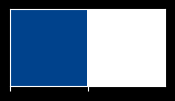

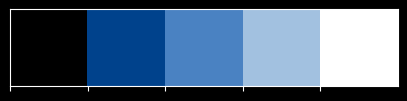

In [37]:
fcp_v1 = ["#00428C", "#FFFFFF"]
sns.palplot(sns.color_palette(fcp_v1))
fcp_v2 = ["#000000", "#00428C", "#4a82c2", "#a2c1e0", "#FFFFFF"]
sns.palplot(sns.color_palette(fcp_v2))

##### Plotting the visualization

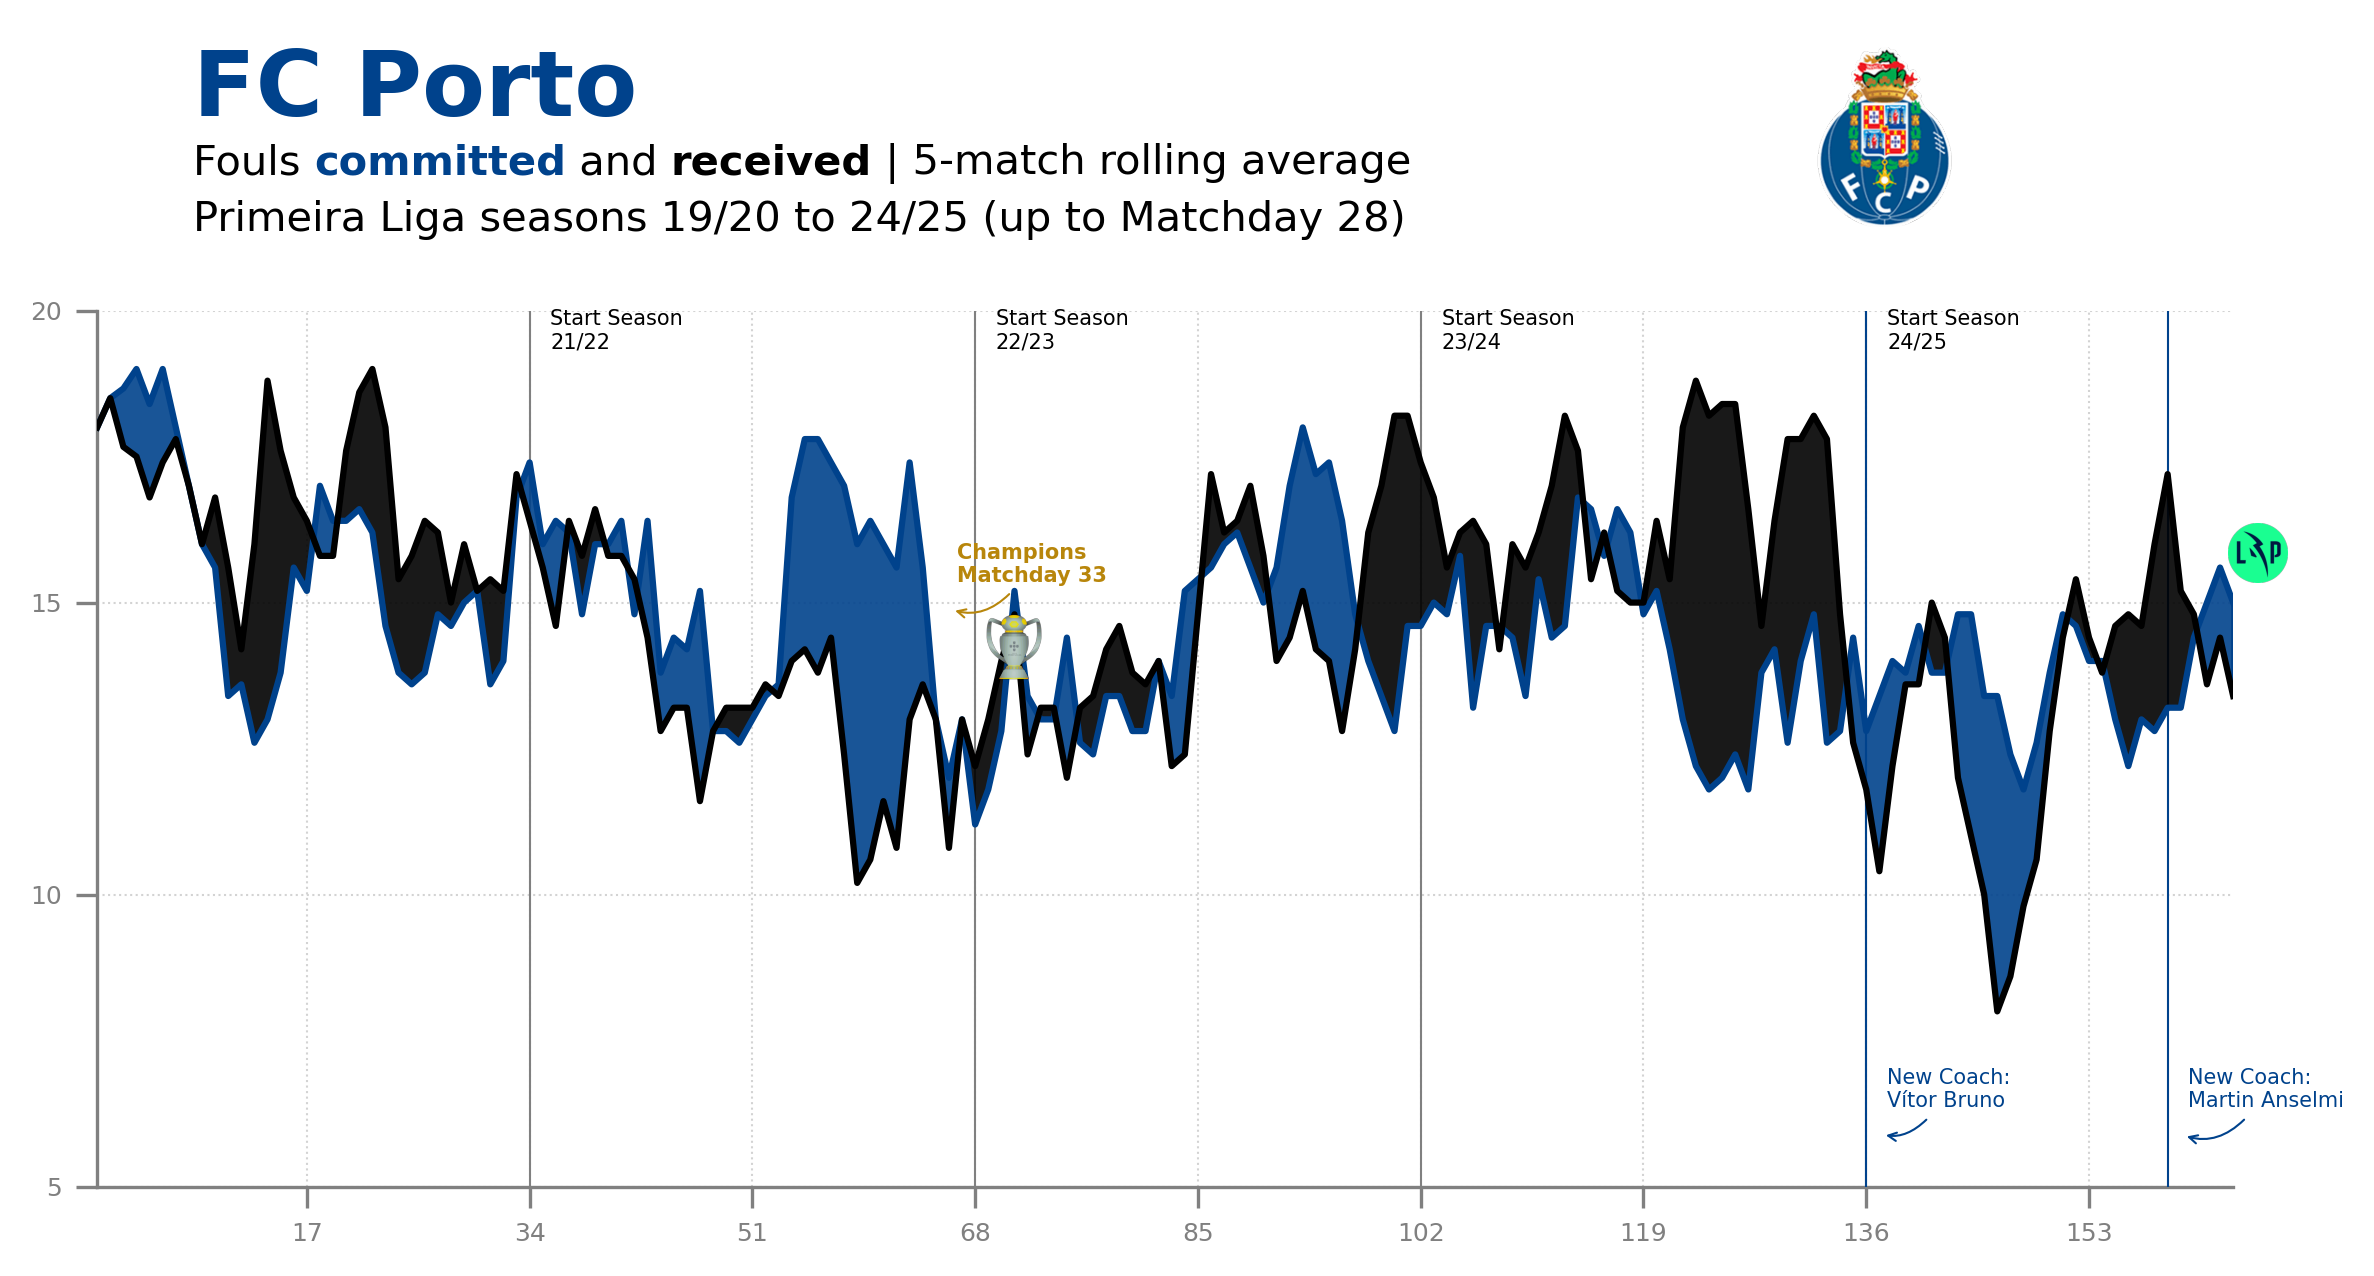

In [38]:
# ------------------------------
# IMPORTS
# ------------------------------
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen
from PIL import Image
import matplotlib.ticker as ticker
from highlight_text import fig_text

# ------------------------------
# FIGURE SETUP
# ------------------------------
fig = plt.figure(figsize=(8, 4), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

# Spine and grid styling
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")
ax.grid(visible=True, lw=0.5, ls=":", color="lightgrey", zorder=1)

# ------------------------------
# DATA PLOTTING
# ------------------------------
matchdays = range(1, 165)
line_1 = ax.plot(matchdays, Y_for, color="#00428C", zorder=4)  # Accurate Passes for
line_2 = ax.plot(matchdays, Y_ag, color="#000000", zorder=4)  # Accurate Passes against

# Axis limits
ax.set_xlim(1, len(Y_for))
ax.set_ylim(5, 20)


# ------------------------------
# SEASON MARKERS
# ------------------------------
SEASON_BREAKS = [34, 68, 102, 136, 170]
SEASON_ANNOTATIONS = [
    (34, 19, "Start Season\n21/22"),
    (68, 19, "Start Season\n22/23"),
    (102, 19, "Start Season\n23/24"),
    (136, 19, "Start Season\n24/25"),
]

COACH_ANNOTATIONS = [
    (136, 6, "New Coach:\nVítor Bruno", line_1[0].get_color()),
    (159, 6, "New Coach:\nMartin Anselmi", line_1[0].get_color()),
]

# Vertical season dividers
for x in SEASON_BREAKS:
    ax.plot(
        [x, x],
        [ax.get_ylim()[0], ax.get_ylim()[1]],
        ls="-",
        lw=0.5,
        color="grey",
        zorder=3,
    )

# Vertical coach change dividers
for x_val, _, _, color in COACH_ANNOTATIONS:
    ax.plot(
        [x_val, x_val],
        [ax.get_ylim()[0], ax.get_ylim()[1]],
        ls="-",
        lw=0.5,
        color=color,
        zorder=3,
    )

# ------------------------------
# ANNOTATIONS
# ------------------------------
ARROW_STYLE = dict(
    arrowstyle="->",
    shrinkA=0,
    shrinkB=5,
    linewidth=0.5,
    connectionstyle="angle3,angleA=60,angleB=-30",
    zorder=4,
)

# Season start labels
for x, y, text in SEASON_ANNOTATIONS:
    ax.annotate(
        text=text,
        xy=(x, y),
        xytext=(5, 5),
        textcoords="offset points",
        size=5,
        color="black",
        arrowprops=ARROW_STYLE,
        zorder=4,
    )

# Coach labels
for x, y, text, color in COACH_ANNOTATIONS:
    ax.annotate(
        text=text,
        xy=(x, y),
        xytext=(5, 5),
        textcoords="offset points",
        size=5,
        color=color,
        arrowprops={**ARROW_STYLE, "color": color},
        zorder=4,
    )

# Championship annotation
ax.annotate(
    xy=(65, 15),
    xytext=(5, 5),
    textcoords="offset points",
    text="Champions\nMatchday 33",
    size=5,
    color="#B8860B",
    weight="bold",
    arrowprops=dict(
        arrowstyle="->",
        shrinkA=0,
        shrinkB=5,
        color="#B8860B",
        linewidth=0.5,
        connectionstyle="angle3,angleA=60,angleB=-30",
    ),
    zorder=4,
)

# ------------------------------
# FILL BETWEEN AREAS
# ------------------------------
ax.fill_between(
    matchdays,
    Y_ag["Value"],
    Y_for["Value"],
    where=Y_for["Value"] > Y_ag["Value"],
    interpolate=True,
    alpha=0.90,
    zorder=3,
    color=line_1[0].get_color(),
)

ax.fill_between(
    matchdays,
    Y_ag["Value"],
    Y_for["Value"],
    where=Y_ag["Value"] > Y_for["Value"],
    interpolate=True,
    alpha=0.90,
    color=line_2[0].get_color(),
    zorder=3,
)

# ------------------------------
# TICK FORMATTING
# ------------------------------
ax.tick_params(
    color="grey", length=5, which="major", labelsize=6, labelcolor="grey", zorder=3
)
ax.xaxis.set_major_locator(ticker.MultipleLocator(17))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# ------------------------------
# TITLES & TEXT
# ------------------------------
fig_text(
    x=0.12,
    y=1.1,
    s="FC Porto",
    color=line_1[0].get_color(),
    weight="bold",
    size=22,
    annotationbbox_kw={"xycoords": "figure fraction"},
)

fig_text(
    x=0.12,
    y=1.02,
    s="Fouls <committed> and <received> | 5-match rolling average \nPrimeira Liga seasons 19/20 to 24/25 (up to Matchday 28)",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"},
    ],
    color="black",
    size=10,
    annotationbbox_kw={"xycoords": "figure fraction"},
)


# ------------------------------
# LOGO PLACEMENT
# ------------------------------
def data_to_fig_coords(ax, x_data, y_data, fig):
    """Convert data coordinates to figure coordinates [0-1 range]"""
    display_coords = ax.transData.transform((x_data, y_data))
    fig_width, fig_height = fig.get_size_inches() * fig.dpi
    return display_coords[0] / fig_width, display_coords[1] / fig_height


def add_logo(fig, image, x_pos, y_pos, width=0.05, height=0.05):
    """Helper to add logos at specified positions"""
    logo_ax = fig.add_axes([x_pos, y_pos, width, height], zorder=4)
    logo_ax.imshow(image, extent=[0.25, 0.75, 0.25, 0.75])
    logo_ax.axis("off")


# Load logos
team_logo = Image.open(
    urlopen("https://images.fotmob.com/image_resources/logo/teamlogo/9773.png")
)
competition_logo = Image.open(
    urlopen("https://images.fotmob.com/image_resources/logo/leaguelogo/61.png")
)
trophy_logo = Image.open(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\Main level\media\Primeira_Liga_Trophy.png"
)

# Calculate logo positions
fig_rel_x, fig_rel_y = data_to_fig_coords(
    ax, float(X.iloc[163]), float(Y_for["Value"].iloc[163]), fig
)
trophy_fig_rel_x, trophy_fig_rel_y = data_to_fig_coords(
    ax, float(X.iloc[66]), float(Y_for["Value"].iloc[66] + 1), fig
)

# Add logos
add_logo(fig, team_logo, 0.75, 0.95, 0.15, 0.15)  # Top-right
add_logo(fig, competition_logo, fig_rel_x + 0.06, fig_rel_y + 0.03)  # Last data point
add_logo(
    fig, trophy_logo, trophy_fig_rel_x, trophy_fig_rel_y, 0.055, 0.055
)  # Championship point


# ------------------------------
# SAFE LAYOUT ADJUSTMENT (Avoids warning)
# ------------------------------
def auto_adjust_layout(fig, top=0.88, bottom=0.15, left=0.08, right=0.97):
    """
    Ajusta margens de forma segura, evitando problemas com add_axes.
    """
    fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right)


auto_adjust_layout(fig)

# ------------------------------
# FINAL SAVE
# ------------------------------
fig.savefig(
    r"C:\Users\Vitor\Desktop\Football Data Analytics\My_Projects\01_xG_Rolling_plot\media\5 Rolling Averages\Ball_Possession_Porto_5Rolling_Average_1920_2425.jpg",
    transparent=True,
    bbox_inches="tight",
    dpi=300,
)
